<h1 align="center">Google Data Analytics Capstone Project</h1>
<h2 align="center">Cyclistic - Divvy Chicago Dataset<h2>

## Introduction
<p style="text-indent:2em;">Cyclistic is a fictional bike share company. As a Junior Data Analyst, analyze the dataset and answer the key business questions. The director of marketing believes the company’s future success depends on maximizing the number of annual memberships. Therefore, understanding how casual riders and annual members use Cyclistic bikes differently will help design a new marketing strategy to convert casual riders into annual members. Cyclistic executives will only approve the recommendations, that is backed up with compelling data insights and professional data visualizations.</p>

<p style="text-indent:2em;">Cyclistic has more than 5800 bicycles and 600 docking stations. Cyclistic offers reclining bikes, hand tricycles and cargo bikes, making bike share more inclusive to people with disablities and riders who can't use a standard two wheeled bike. The majarity of riders opt for traditional bikes; about 8% of riders use the assitive options. Cyclistic users are more likely to ride for pleasure, but 30% use them to commute to work each day.</p>

### Stakeholders:
- <b>Cyclistic Executive Team</b>: They decide whether to approve the recommended marketing program.
- <b>Lily Moreno</b>: Director of marketing and reporting manager. Responsible for the development of campaigns and initiatives to promote the bike-share program.
- <b>Cyclistic Marketing Analytics Team</b>: A team of data analysts who are rsponsible for collecting, analyzing, and reporting data that helps guide Cyclistic marketing strategy.

### Scenario:
<p style="text-indent:2em;">Cyclistic launched in 2016, offers a successful bike-share program. The bikes can be unlocked from one station and returned to any other station in the system anytime. Until now, Cyclistic's marketing strategy relied on building general awarenessand appealing to broad consumer segments. One approach that helped make these things possible was the flexibility of its pricing plans: <b>single-ride passes</b>, <b>full-day passes</b>, and <b>annual memberships</b>. Customers who purchase single-ride or full-day passes are referred to as casual riders(casuals). Customers who purchased annual memberships are called as Cyclistic members(members). Cyclistic's finance analysts have concluded that members are much more profitable than casual riders. Although the pricing flexibility helps Cyclistic attract more customers, Moreno believes that maximizing the number of members will be key to future growth. Rather than creating a marketing campaign that targets all new customers, Moreno belives there is a very good chance to convert casual riders into members, since casual riders are already aware of the Cyclistic for their mobility needs.</p>

<p style="text-indent:2em;">Moreno has set a clear goal: Design marketing strategies aimed at converting casual riders into annual members. To do that, marketing analyst team needs to better understand how casual riders and annual members differ, why would casual riders buy a membership and how digital media could affect their marketing tactics.
    
<p style="text-indent:2em;">We will follow the six phases of data analysis:</p>

1. <b>[Ask](#1)</b>,
2. <b>[Prepare](#2)</b>,
3. <b>[Process](#3)</b>,
4. <b>[Analyze](#4)<b/>,
5. <b>[Share](#4)</b> and
6. <b>[Act](#5)</b>

<a id="1"></a>
### Ask:
<p style="text-indent:2em;">During the **ask** phase, we use structured thinking to recognize the current situation or problem, then deploy SMART questions that lead to key insights. The problem is to increase the profitability of the Cyclistic. Moreno belives, increasing the annual membership by converting the casual riders to annual members is going to increase the profit. The following questions will help in gaining insights that drive business descisions.</p>

**Questions**:
- How do annual members and casual riders use Cyclistic  bikes differently?(e.g., frequency, trip duration, bike type preference)
- Why would casual riders buy Cyclistic annual membership?(e.g., convenience factors)

<a id="2"></a>
### Prepare:
&nbsp;&nbsp;&nbsp;&nbsp;Cyclistics historical trip data will be used to analyze and indentify trends. The data has been made available by Motivate International Inc. under this [license](https://divvybikes.com/data-license-agreement). So this a verified public data. You can download the data from this [link](https://divvy-tripdata.s3.amazonaws.com/index.html). The data from source is organized in monthly fashion, I concatenated all the months of 2023 to form a single dataframe. Due to the limitations in my system, analysis will be done in google colab. There is no privacy issue in the dataset.

<p style="font-size:15px;">Importing the necessary libraries needed for the analysis</p>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

<p style="font-size:15px;">Mounting google drive</p>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


<p style="font-size:15px">Readding the csv file to create a dataframe</p>

In [3]:
df = pd.read_csv('/content/drive/MyDrive/divvy/df_2023.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5719877 entries, 0 to 5719876
Data columns (total 13 columns):
 #   Column              Dtype  
---  ------              -----  
 0   ride_id             object 
 1   rideable_type       object 
 2   started_at          object 
 3   ended_at            object 
 4   start_station_name  object 
 5   start_station_id    object 
 6   end_station_name    object 
 7   end_station_id      object 
 8   start_lat           float64
 9   start_lng           float64
 10  end_lat             float64
 11  end_lng             float64
 12  member_casual       object 
dtypes: float64(4), object(9)
memory usage: 567.3+ MB


In [5]:
df.head(3)

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,F96D5A74A3E41399,electric_bike,2023-01-21 20:05:42,2023-01-21 20:16:33,Lincoln Ave & Fullerton Ave,TA1309000058,Hampden Ct & Diversey Ave,202480.0,41.924074,-87.646278,41.930000,-87.640000,member
1,13CB7EB698CEDB88,classic_bike,2023-01-10 15:37:36,2023-01-10 15:46:05,Kimbark Ave & 53rd St,TA1309000037,Greenwood Ave & 47th St,TA1308000002,41.799568,-87.594747,41.809835,-87.599383,member
2,BD88A2E670661CE5,electric_bike,2023-01-02 07:51:57,2023-01-02 08:05:11,Western Ave & Lunt Ave,RP-005,Valli Produce - Evanston Plaza,599,42.008571,-87.690483,42.039742,-87.699413,casual


<a id="3"></a>
### Process
<p style="font-size:15px">Let's check the data for any duplicates and null values.</p>

In [6]:
duplicates = df[df.duplicated()]
duplicates

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual


In [7]:
df.isnull().sum()

ride_id                    0
rideable_type              0
started_at                 0
ended_at                   0
start_station_name    875716
start_station_id      875848
end_station_name      929202
end_station_id        929343
start_lat                  0
start_lng                  0
end_lat                 6990
end_lng                 6990
member_casual              0
dtype: int64

In [8]:
len(df.dropna())/ len(df) * 100

75.73077183303067

In [9]:
df.isnull().sum()/len(df) * 100

ride_id                0.000000
rideable_type          0.000000
started_at             0.000000
ended_at               0.000000
start_station_name    15.310049
start_station_id      15.312357
end_station_name      16.245140
end_station_id        16.247605
start_lat              0.000000
start_lng              0.000000
end_lat                0.122205
end_lng                0.122205
member_casual          0.000000
dtype: float64

<p style="font-size:15px">Since there are so many null values, let's find a way it fill those null values.</p>

In [10]:
df2=df[['start_station_name','start_station_id']]

<p style="font-size:15px">As you can see there are more null values in start_station_id than in start_station_name

In [11]:
print(len(df2))
print(len(df2.dropna(subset=['start_station_name'])), len(df2)-len(df2.dropna(subset=['start_station_name'])))
print(len(df2.dropna(subset=['start_station_id'])), len(df2)-len(df2.dropna(subset=['start_station_id'])))
len(df2.dropna(subset=['start_station_name', 'start_station_id'],how='all'))

5719877
4844161 875716
4844029 875848


4844161

<p style="font-size:15px">From the following code you can see start_station_name cannot be filled using start_station_id

In [12]:
(pd.isna(df2['start_station_name']) & df2['start_station_id'].notna()).sum()

0

<p style="font-size:15px">The same routine goes for end_station_name

In [13]:
df3=df[['end_station_name','end_station_id']]

In [14]:
print(len(df3))
print(len(df3.dropna(subset=['end_station_name'])), len(df3)-len(df3.dropna(subset=['end_station_name'])))
print(len(df3.dropna(subset=['end_station_id'])), len(df3)-len(df3.dropna(subset=['end_station_id'])))
len(df3.dropna(subset=['end_station_name', 'end_station_id'],how='all'))

5719877
4790675 929202
4790534 929343


4790675

In [15]:
(pd.isna(df3['end_station_name']) & df3['end_station_id'].notna()).sum()

0

<p style="font-size:15px">So we are dropping start_station_id and end_station_id

In [16]:
df = df.drop(['start_station_id','end_station_id'],axis=1)

<p style="font-size:15px">Now there are only 4 columns with null values. Both start_station_name and end_station_name can be filled with their respective latitudes and longitudes. There are no null values in start latitude and longitude but end latitude and longitude has null values. Since the null values in the end latitude and longitude correspond to only 0.001 percentage, the null values are dropped.

In [17]:
df.isnull().sum()

ride_id                    0
rideable_type              0
started_at                 0
ended_at                   0
start_station_name    875716
end_station_name      929202
start_lat                  0
start_lng                  0
end_lat                 6990
end_lng                 6990
member_casual              0
dtype: int64

<p style="font-size:15px">For a geographical area like Chicago city, rounding the decimals to 4 will clearly define different streets.

In [18]:
df[['start_lat','start_lng']]=df[['start_lat','start_lng']].round(4)

<p style="font-size:15px">First we are grouping start latitude and longitude to the start_station_name then transforming the null values in the start_station_name to the most frequent start_station_name for the grouped start latitude and longitude.</p>

In [19]:
df['start_station_name'] = df.groupby(['start_lat', 'start_lng'])['start_station_name'].transform(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else np.nan))

<p style="font-size:15px;">Dropping any null values in end latitude and longitude columns

In [20]:
df = df.dropna(subset=['end_lat','end_lng'], how='any')

In [21]:
df[['end_lat','end_lng']]=df[['end_lat','end_lng']].round(4)

<p style="font-size:15px;">Same transformation in end_station_name column

In [22]:
df['end_station_name'] = df.groupby(['end_lat', 'end_lng'])['end_station_name'].transform(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else np.nan))

In [23]:
df.isnull().sum()

ride_id                    0
rideable_type              0
started_at                 0
ended_at                   0
start_station_name    537747
end_station_name      624325
start_lat                  0
start_lng                  0
end_lat                    0
end_lng                    0
member_casual              0
dtype: int64

<p style="font-size:15px;">Still there are so many null values. Until now we only used start_station_name and grouped start latitude and longitude to fill start_station_name and same for end_station_name. Let's see we can combine both start_station_name and end_station_name with their respective latitude and longitude.

In [24]:
df2 = df[['start_station_name','start_lat','start_lng']]
df3 = df[['end_station_name','end_lat','end_lng']]

<p style="font-size:15px;">We are creating a common column names for concating.

In [25]:
df2.rename(columns={'start_station_name':'station_name', 'start_lat':'lat', 'start_lng':'lng'}, inplace=True)
df3.rename(columns={'end_station_name':'station_name', 'end_lat':'lat', 'end_lng':'lng'}, inplace=True)

<ipython-input-25-586bb43a01ca>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.rename(columns={'start_station_name':'station_name', 'start_lat':'lat', 'start_lng':'lng'}, inplace=True)
<ipython-input-25-586bb43a01ca>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3.rename(columns={'end_station_name':'station_name', 'end_lat':'lat', 'end_lng':'lng'}, inplace=True)


In [26]:
df4 = pd.concat([df2,df3],axis=0)

In [27]:
print(len(df))
print(len(df.dropna()))

5712887
4750890


<p style="font-size:15px;">Now fill the null values in station_name column, so both start and end station help fill each other

In [28]:
df4['station_name'] = df4.groupby(['lat', 'lng'])['station_name'].transform(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else np.nan))

<p style="font-size:15px;">Dropping remaining null values, so it doesn't disturb with null values for the following process

In [29]:
df4=df4.dropna()

<p style="font-size:15px;">The zip function is used to iterate over these three series in parallel, creating tuples of (lat, lng, station_name) for each row in df4. Then the dictionary comprehension creates key-value pairs in the lookup_dict(dictionary) where the tuple(lat, lng) is key and station_name is the value. By using this lookup_dict we try to fill the null values in start_station_name and end_station_name.</p>

In [30]:
lookup_dict = {(lat, lng): station for lat, lng, station in zip(df4['lat'], df4['lng'], df4['station_name'])}
df['start_station_name'] = [lookup_dict.get((lat, lng), station) for lat, lng, station in zip(df['start_lat'], df['start_lng'], df['start_station_name'])]
df['end_station_name'] = [lookup_dict.get((lat, lng), station) for lat, lng, station in zip(df['end_lat'], df['end_lng'], df['end_station_name'])]

In [31]:
len(df)

5712887

In [32]:
len(df.dropna())/ len(df) * 100

83.99271681725895

<p style="font-size:15px;">Dropping the remaining null values

In [33]:
df = df.dropna()

<p style="font-size:15px;">Still a certain station_name(both start and end) have different latitudes and longitudes, So we are making the latitudes and longitudes common for the specific satation_name

In [34]:
df['start_lat'] = df.groupby('start_station_name')['start_lat'].transform(lambda x:x.mode().iloc[0])
df['start_lng'] = df.groupby('start_station_name')['start_lng'].transform(lambda x:x.mode().iloc[0])

In [35]:
df['end_lat'] = df.groupby('end_station_name')['end_lat'].transform(lambda x:x.mode().iloc[0])
df['end_lng'] = df.groupby('end_station_name')['end_lng'].transform(lambda x:x.mode().iloc[0])

<p style="font-size:15px;">Now we are doing some feature engineering for better understanding the dataset and to derive meaningful insights during analysis. First converting the object format of the started_at and ended_at to datetime format for feature engineering purpose.

In [36]:
df['started_at'] = pd.to_datetime(df['started_at'])
df['ended_at'] = pd.to_datetime(df['ended_at'])

<p style="font-size:15px;">Now we are going to create new column for the duration of each ride

In [37]:
df['duration'] = df['ended_at'] - df['started_at']

<p style="font-size:15px;">After the subtraction it produces days and remaining time, So we are separating the days from remaining time

In [38]:
df['duration_days']= df['duration'].dt.days

In [39]:
df['duration_days'].value_counts()

duration_days
 0    4798121
 1        143
-1        135
 2          3
 3          2
-8          2
 8          1
 7          1
 4          1
Name: count, dtype: int64

<p style="font-size:15px;">Since majority of the days fall on the same day(0) and next day(1), we are removing remaining days

In [40]:
df = df[~df['duration_days'].isin([-1, -8, 2, 3, 8, 7, 4])]

<p style="font-size:15px;">After the usage dropping the duration_days column

In [41]:
df = df.drop('duration_days', axis=1)

<p style="font-size:15px;">Creating a new column ride_duration_min from the duration column

In [42]:
df['ride_duration_min'] = df['duration'].dt.total_seconds()
df['ride_duration_min'] = df['ride_duration_min'].apply(lambda x: f"{int(x / 60):0d}.{int(x % 60)}")

<p style="font-size:15px;">The created ride_duration_min will be in object format, so convert it into float type

In [43]:
df['ride_duration_min'] = df['ride_duration_min'].astype(float)

<p style="font-style:15px;">After use drop the duration column

In [44]:
df.drop('duration',axis=1,inplace=True)

<p style="font_size:15px;">Now let's get date, month, days, hours of the rides from started_at column

In [45]:
df['date'] = df['started_at'].dt.date

In [46]:
df['months_num'] = df['started_at'].dt.month
df['weeks_num'] = df['started_at'].dt.weekday

In [47]:
df.head(2)

,ride_id,rideable_type,started_at,ended_at,start_station_name,end_station_name,start_lat,start_lng,end_lat,end_lng,member_casual,ride_duration_min,date,months_num,weeks_num
0,F96D5A74A3E41399,electric_bike,2023-01-21 20:05:42,2023-01-21 20:16:33,Lincoln Ave & Fullerton Ave,Hampden Ct & Diversey Ave,41.9242,-87.6464,41.9300,-87.6400,member,10.51,2023-01-21,1,5
1,13CB7EB698CEDB88,classic_bike,2023-01-10 15:37:36,2023-01-10 15:46:05,Kimbark Ave & 53rd St,Greenwood Ave & 47th St,41.7996,-87.5947,41.8098,-87.5994,member,8.29,2023-01-10,1,1


<p style="font_size:15px;">Since the generated months and days are in integers let's convert it into their respecctive names

In [48]:
month_names = {1: "January", 2: "February", 3: "March", 4: "April", 5: "May", 6: "June", 7: "July", 8: "August", 9: "September", 10: "October", 11: "November", 12: "December"}
df['months'] = df['months_num'].map(month_names)

In [49]:
weekdays = {0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 4: 'Friday', 5: 'Saturday', 6: 'Sunday'}
df['days'] = df['weeks_num'].map(weekdays)

In [50]:
days_ends = {'Monday':'weekday', 'Tuesday':'weekday', 'Wednesday':'weekday', 'Thursday':'weekday', 'Friday':'weekday', 'Saturday':'weekend', 'Sunday':'weekend'}
df['week'] = df['days'].map(days_ends)

In [51]:
df['start_hour'] = df['started_at'].dt.hour
df['end_hour'] = df['ended_at'].dt.hour

<p style="font_size:15px;">Now convert the hours to daytime and night

In [52]:
noons= {0:'night', 1:'night', 2:'night', 3:'night', 4:'night', 5:'night', 6:'morning', 7:'morning', 8:'morning', 9:'morning', 10:'morning', 11:'morning', 12:'afternoon',
         13:'afternoon', 14:'afternoon', 15:'afternoon', 16:'afternoon', 17:'evening', 18:'evening', 19:'evening', 20:'night', 21:'night', 22:'night', 23:'night'}
df['start_period'] = df['start_hour'].map(noons)
df['end_period']=df['end_hour'].map(noons)

<p style="font_size:15px;">Let's create a new column distance_km with help of geopy library

In [53]:
from geopy.distance import great_circle
def dis(x):
    start_pos=(x['start_lat'],x['start_lng'])
    end_pos=(x['end_lat'],x['end_lng'])
    return great_circle(start_pos,end_pos).kilometers
df['distance_km'] = df.apply(dis,axis=1)

In [54]:
df['distance_km'] = df['distance_km'].round(2)

<p style="font_size:15px;">There are some rides that starts and ends within seconds so we need to eliminate that

In [55]:
len(df[(df['ride_duration_min']<=60) & (df['start_station_name']==df['end_station_name'])])

291191

In [56]:
len(df[(df['ride_duration_min']<=60) & (df['start_station_name']==df['end_station_name']) & (df['distance_km']==0)])

282853

In [57]:
df = df.drop(df[(df['ride_duration_min']<=60) & (df['start_station_name']==df['end_station_name'])].index)

<p style="font_size:15px;">Because some rides have both start station and end station the same, So the distance calculated will be zero. So replace these zeroes with mean distance.

In [58]:
df['distance_km'] = df['distance_km'].replace(0, df['distance_km'].mean())

<p style="font_size:15px;">Create routes column by concatenating start station and end station with " - "

In [59]:
df['routes'] = df['start_station_name'].str.cat(df['end_station_name'], sep=' - ')

In [60]:
df.head(2)

,ride_id,rideable_type,started_at,ended_at,start_station_name,end_station_name,start_lat,start_lng,end_lat,end_lng,...,weeks_num,months,days,week,start_hour,end_hour,start_period,end_period,distance_km,routes
0,F96D5A74A3E41399,electric_bike,2023-01-21 20:05:42,2023-01-21 20:16:33,Lincoln Ave & Fullerton Ave,Hampden Ct & Diversey Ave,41.9242,-87.6464,41.9300,-87.6400,...,5,January,Saturday,weekend,20,20,night,night,0.83,Lincoln Ave & Fullerton Ave - Hampden Ct & Div...
1,13CB7EB698CEDB88,classic_bike,2023-01-10 15:37:36,2023-01-10 15:46:05,Kimbark Ave & 53rd St,Greenwood Ave & 47th St,41.7996,-87.5947,41.8098,-87.5994,...,1,January,Tuesday,weekday,15,15,afternoon,afternoon,1.20,Kimbark Ave & 53rd St - Greenwood Ave & 47th St


<p style="font-style:15px;">Create seasons column with months integer

In [61]:
month_seasons = {1: "winter", 2: "winter", 3: "spring", 4: "spring", 5: "spring", 6: "summer", 7: "summer", 8: "summer", 9: "autumn", 10: "autumn", 11: "autumn", 12: "winter"}
df['seasons'] = df['months_num'].map(month_seasons)

<p style="font-size:15px;">To avoid crashes due to limited computing power, I've saved a clean version of the dataframe. We can use this saved dataframe for the next step.

In [65]:
# df.to_csv('/content/drive/MyDrive/divvy/df_2023_cleaned.csv',index=False)

<a id="4"></a>
### Analyze and Share
<p style="font-size:15px;">Now let's analyze the data for gaining insights

In [3]:
# df = pd.read_csv('/content/drive/MyDrive/divvy/df_2023_cleaned.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4507073 entries, 0 to 4507072
Data columns (total 25 columns):
 #   Column              Dtype  
---  ------              -----  
 0   ride_id             object 
 1   rideable_type       object 
 2   started_at          object 
 3   ended_at            object 
 4   start_station_name  object 
 5   end_station_name    object 
 6   start_lat           float64
 7   start_lng           float64
 8   end_lat             float64
 9   end_lng             float64
 10  member_casual       object 
 11  ride_duration_min   float64
 12  date                object 
 13  months_num          int64  
 14  weeks_num           int64  
 15  months              object 
 16  days                object 
 17  week                object 
 18  start_hour          int64  
 19  end_hour            int64  
 20  start_period        object 
 21  end_period          object 
 22  distance_km         float64
 23  routes              object 
 24  seasons             obje

<p style="font-size:15px;">Let's see how Members and Casuals differ by total number of rides

In [5]:
df['member_casual'].value_counts()

member_casual
member    2947174
casual    1559899
Name: count, dtype: int64

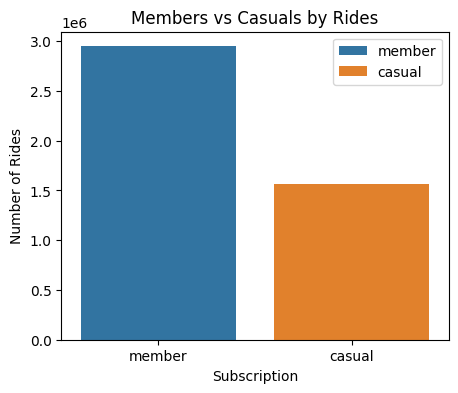

In [6]:
plt.figure(figsize=(5,4))
sns.countplot(data=df, x='member_casual', hue='member_casual')
plt.xlabel('Subscription')
plt.ylabel('Number of Rides')
plt.title('Members vs Casuals by Rides')
plt.legend(labels= ['member','casual'], loc='upper right')
plt.show()

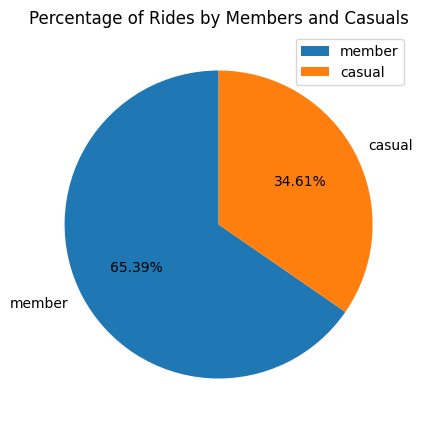

In [7]:
plt.figure(figsize=(5,5))
counts = df['member_casual'].value_counts()
counts = counts.reset_index()
counts.columns = ['member_casual', 'count']
plt.pie(counts['count'], labels=counts['member_casual'], autopct='%.2f%%',startangle=90)
plt.legend(labels= ['member','casual'], loc='upper right')
plt.title('Percentage of Rides by Members and Casuals')
plt.show()

<p style="font-size:15px;">Now different ride types

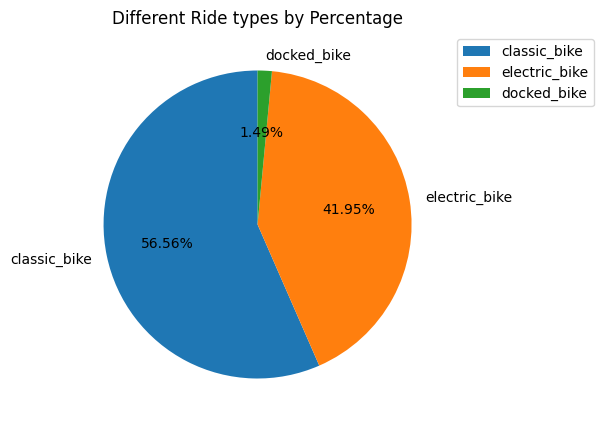

In [8]:
plt.figure(figsize=(6,5))
counts = df['rideable_type'].value_counts()
counts = counts.reset_index()
counts.columns = ['rideable_type', 'count']
plt.pie(counts['count'], labels=counts['rideable_type'], autopct='%.2f%%',startangle=90)
plt.legend(labels= counts['rideable_type'], loc='upper left', bbox_to_anchor=(1.0, 1.0))
plt.title('Different Ride types by Percentage')
plt.show()

<p style="font-size:15px;">Preferred Ride Types by Members and Casuals

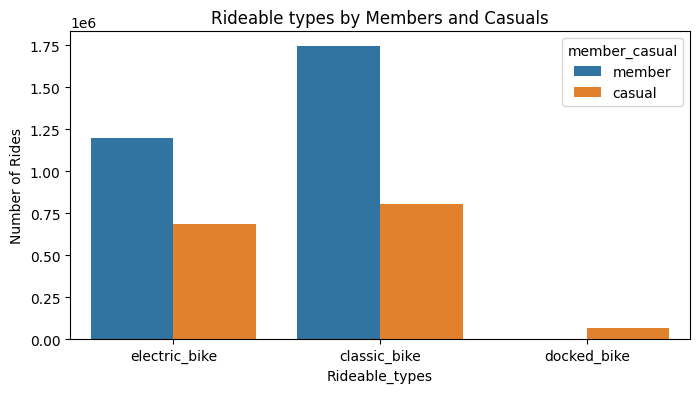

In [9]:
plt.figure(figsize=(8,4))
sns.countplot(data=df, x='rideable_type', hue='member_casual')
plt.title('Rideable types by Members and Casuals')
plt.xlabel('Rideable_types')
plt.ylabel('Number of Rides')
plt.show()

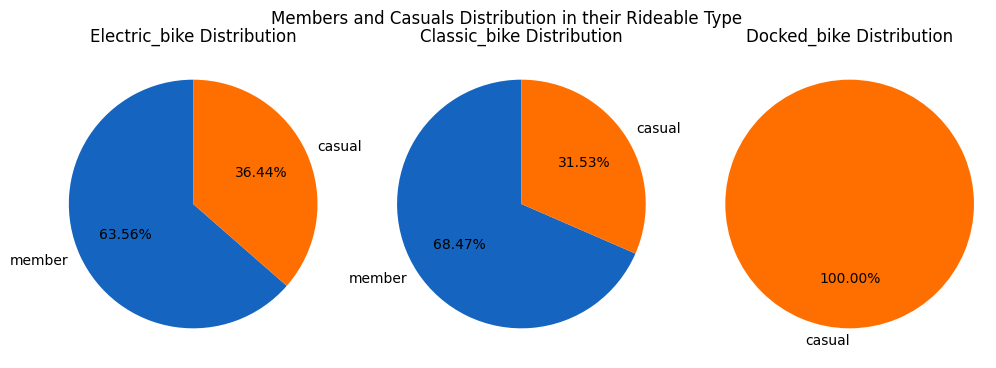

In [10]:
rideable_types = df['rideable_type'].unique()
colors = {'member': '#1565C0', 'casual': '#FF6F00'}
fig, axes = plt.subplots(1, len(rideable_types), figsize=(12, 4))
for ax, rideable_type in zip(axes, rideable_types):
    data = df[df['rideable_type'] == rideable_type]
    counts = data['member_casual'].value_counts()
    ax.pie(counts, labels=counts.index, autopct='%.2f%%', startangle=90,colors=[colors[label] for label in counts.index])
    ax.set_title(f'{rideable_type.capitalize()} Distribution')
    ax.axis('equal')
plt.suptitle('Members and Casuals Distribution in their Rideable Type')
plt.show()

<p style="font-size:15px;">So for, we can see that Members ride more often than Casual and they prefer both Classic and Electric bike. But there's only Casuals for Docked bike, no Members. Now, let's see how Members and Casuals differ by the riding duration and distance they travel.

<p style="font-size:15px;">Before seeing how Members and Casuals differ by the riding duration and travel, let's see how distance and ride duration correlate with one another.

<Figure size 1200x800 with 0 Axes>

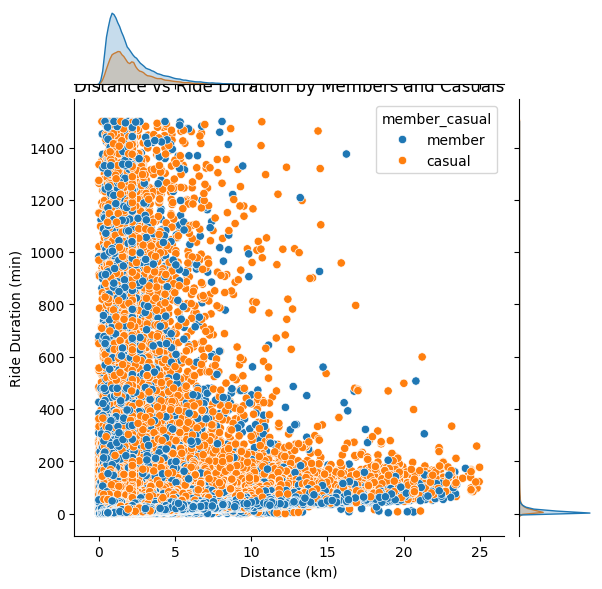

In [11]:
plt.figure(figsize=(12,8))
sns.jointplot(data=df[(df['distance_km']<=25)&(df['ride_duration_min']<=1500)], x='distance_km', y='ride_duration_min', hue='member_casual')
plt.xlabel('Distance (km)')
plt.ylabel('Ride Duration (min)')
plt.title('Distance vs Ride Duration by Members and Casuals')
plt.show()

<p style="font-size:15px;">Let's see it in density plot

<Figure size 1200x800 with 0 Axes>

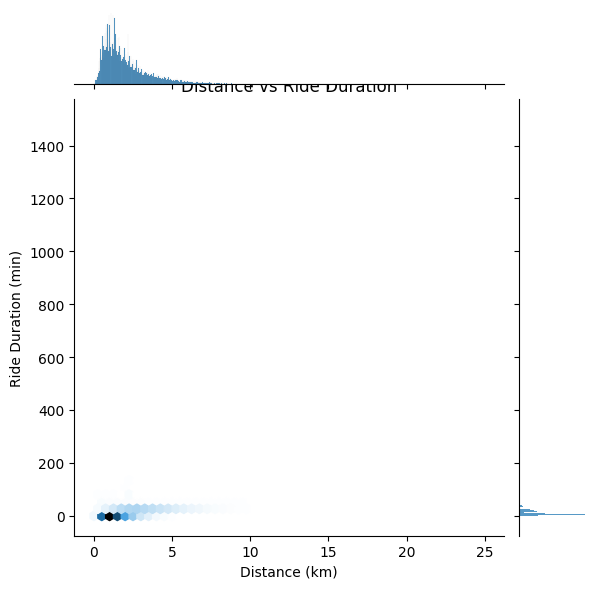

In [12]:
plt.figure(figsize=(12,8))
sns.jointplot(data=df[(df['distance_km']<=25)&(df['ride_duration_min']<=1500)], x='distance_km', y='ride_duration_min', palette='flare', kind='hex')
plt.xlabel('Distance (km)')
plt.ylabel('Ride Duration (min)')
plt.title('Distance vs Ride Duration')
plt.show()

<p style="font-size:15px;">It's too clustered, let's apply some filter

<Figure size 1200x800 with 0 Axes>

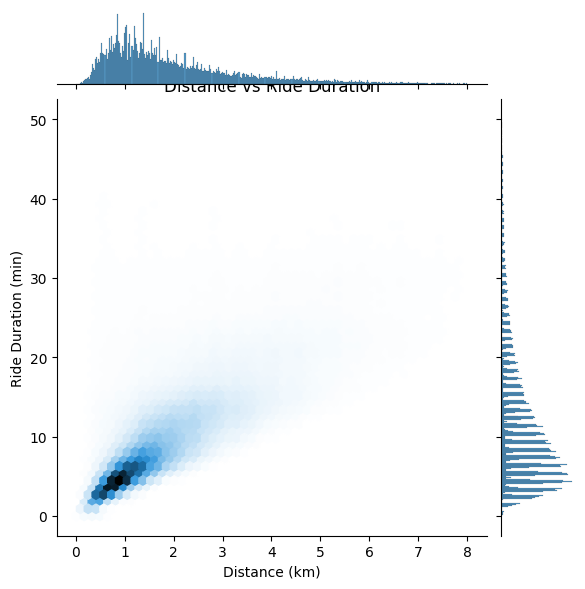

In [13]:
plt.figure(figsize=(12,8))
sns.jointplot(data=df[(df['distance_km']<=8)&(df['ride_duration_min']<=50)], x='distance_km', y='ride_duration_min', palette='flare', kind='hex')
plt.xlabel('Distance (km)')
plt.ylabel('Ride Duration (min)')
plt.title('Distance vs Ride Duration')
plt.show()

<p style="font-size:15px;">Both distance and duration are correlated at the lower end of the spectrum<br>
Now let's see how Members and Casuals differ in distance and duration

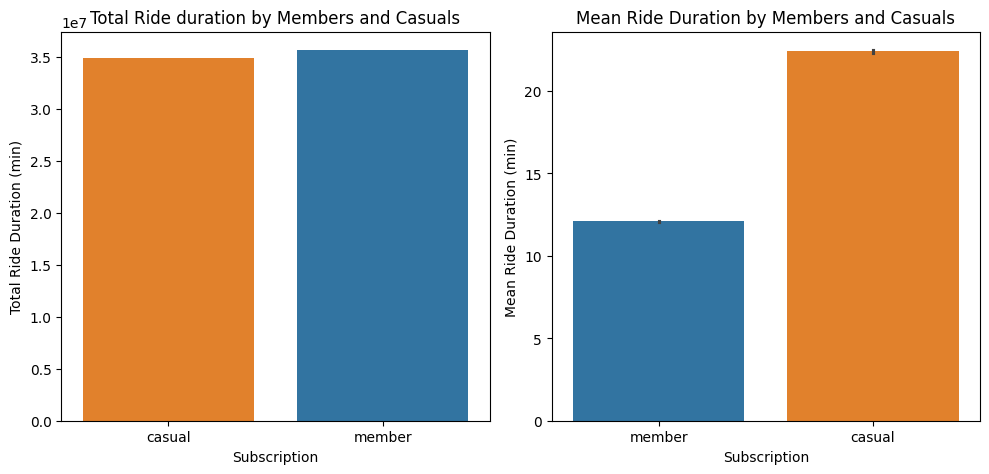

In [14]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

g_df = df.groupby('member_casual', as_index=False)['ride_duration_min'].sum()
hue_order = g_df['member_casual'].unique()[::-1]
sns.barplot(data=g_df, x='member_casual', y='ride_duration_min', hue='member_casual', hue_order= hue_order, ax=axes[0])
axes[0].set_title('Total Ride duration by Members and Casuals')
axes[0].set_ylabel('Total Ride Duration (min)')
axes[0].set_xlabel('Subscription')

sns.barplot(data=df, x='member_casual', y='ride_duration_min', hue='member_casual', ax=axes[1])
axes[1].set_title('Mean Ride Duration by Members and Casuals')
axes[1].set_ylabel('Mean Ride Duration (min)')
axes[1].set_xlabel('Subscription')

plt.tight_layout()
plt.show()

<p style="font-size:15px;">By the total duration of the rides, it seems Members and Casuals are equal but on average Casuals ride longer than Members. In short, Members ride for short duration with high frequency, Casuals ride for long duration with low frquency

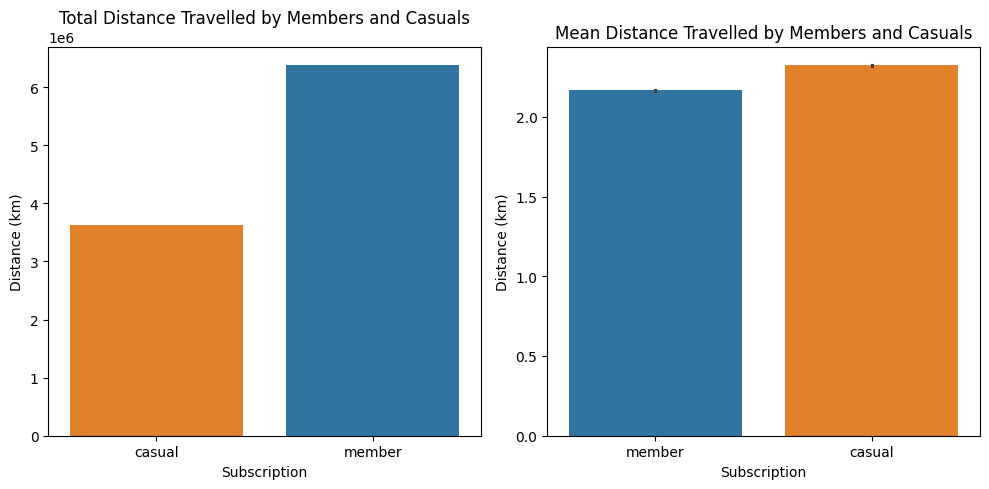

In [15]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
g_df = df.groupby('member_casual', as_index=False)['distance_km'].sum()
hue_order = g_df['member_casual'].unique()[::-1]
sns.barplot(data=g_df, x='member_casual', y='distance_km', hue='member_casual', hue_order=hue_order, ax=axes[0])
axes[0].set_title('Total Distance Travelled by Members and Casuals')
axes[0].set_ylabel('Distance (km)')
axes[0].set_xlabel('Subscription')

sns.barplot(data=df, x='member_casual', y='distance_km', hue='member_casual', ax=axes[1])
axes[1].set_title('Mean Distance Travelled by Members and Casuals')
axes[1].set_ylabel('Distance (km)')
axes[1].set_xlabel('Subscription')

plt.tight_layout()
plt.show()

<p style="font-size:15px;">By total distance travelled, Members travel more distance than Casuals. Though on average Casuals ride long distance than Members, the difference is negligible.



<p style="font-size:15px;">Now let's see how rides are distributeed across a year

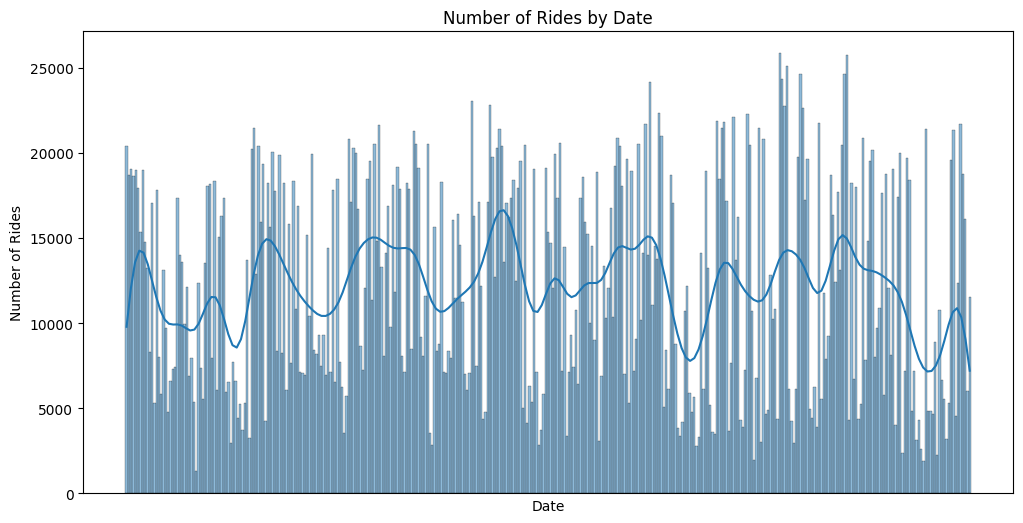

In [55]:
plt.figure(figsize=(12,6))
sns.histplot(df['date'], kde=True)
plt.title('Number of Rides by Date')
plt.tick_params(bottom=False, labelbottom=False)
plt.xlabel('Date')
plt.ylabel('Number of Rides')
plt.show()

<p style="font-size:15px;">To observe the trends, let's group the rides by months

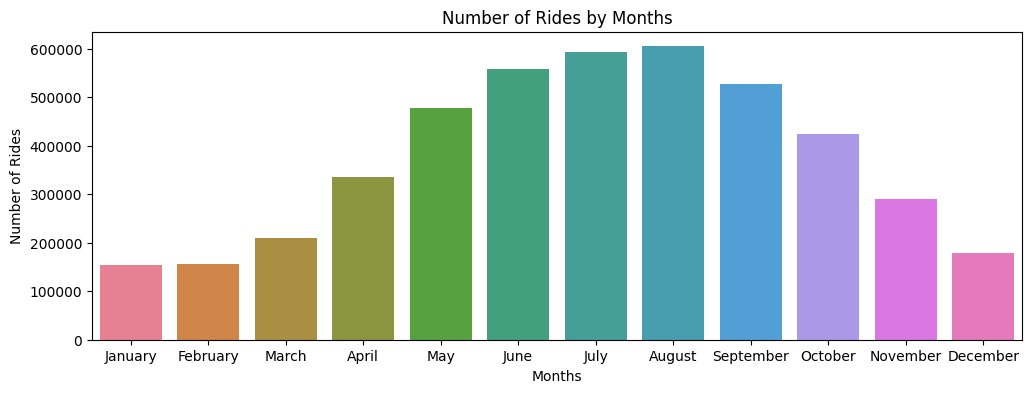

In [17]:
plt.figure(figsize=(12,4))
sns.countplot(data=df,x='months', hue='months',)
plt.title('Number of Rides by Months')
plt.xlabel('Months')
plt.ylabel('Number of Rides')
plt.legend().remove()
plt.show()

<p style="font-size:15px;">It seems the rides steadily increases from March and falls from September.
Let's see how Members and Casuals differ by Months

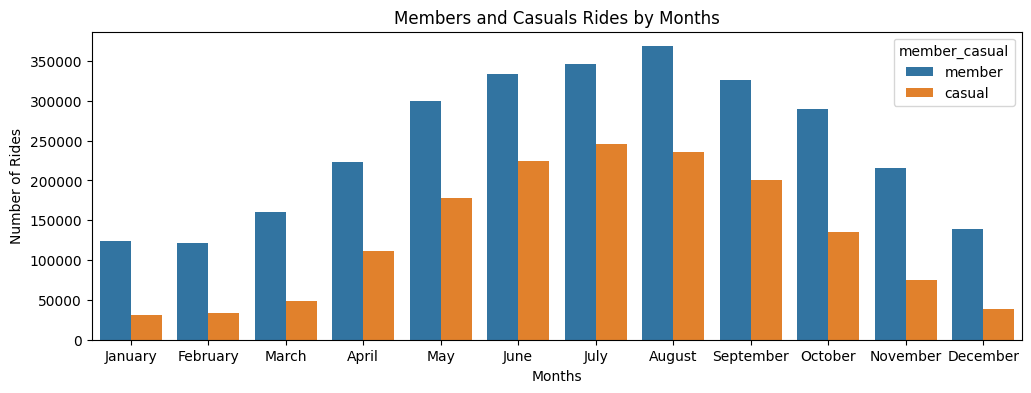

In [18]:
plt.figure(figsize=(12,4))
sns.countplot(data=df,x='months', hue='member_casual')
plt.title('Members and Casuals Rides by Months')
plt.xlabel('Months')
plt.ylabel('Number of Rides')
plt.show()

<p style="font-size:15px;">The above plot clearly shows the seasonal difference in both Members and Casuals<br>
Both Members and Casuals seem to dislike riding in winter, but Casuals dislike it even more. Let's see seasonal patterns later, now number of rides by different ridetypes

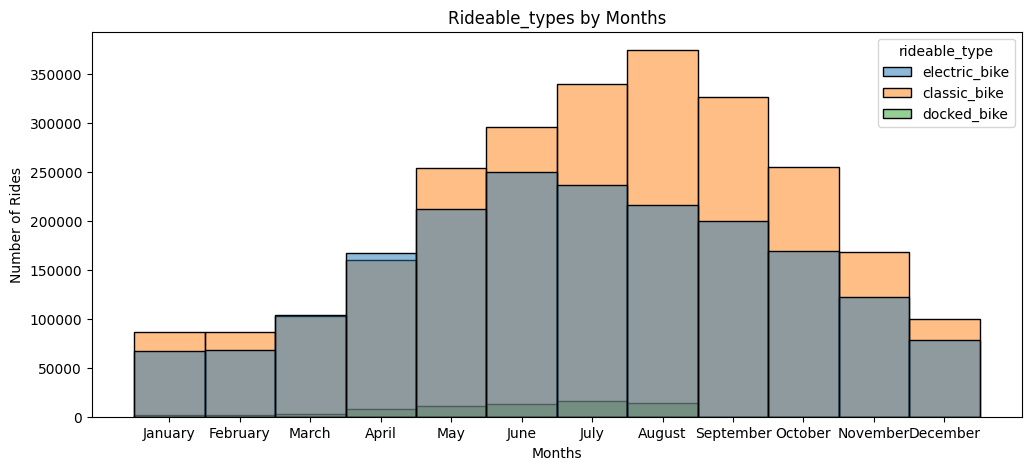

In [19]:
plt.figure(figsize=(12,5))
counts = df['months'].value_counts()
sns.histplot(data=df, x='months', hue='rideable_type')
plt.xticks(ticks=counts.index)
plt.xlabel('Months')
plt.ylabel('Number of Rides')
plt.title('Rideable_types by Months')
plt.show()

<p style="font-size:15px;">From the above plot, we can see that Classic bike is usually preferred than electric bike but certain months electric bikes are preferred. There seems to be some issue with docked bike since there are no rides from september. This can attributed to suspension of docked bikes or insufficient data, let's ignore this fact.

<Figure size 1200x500 with 0 Axes>

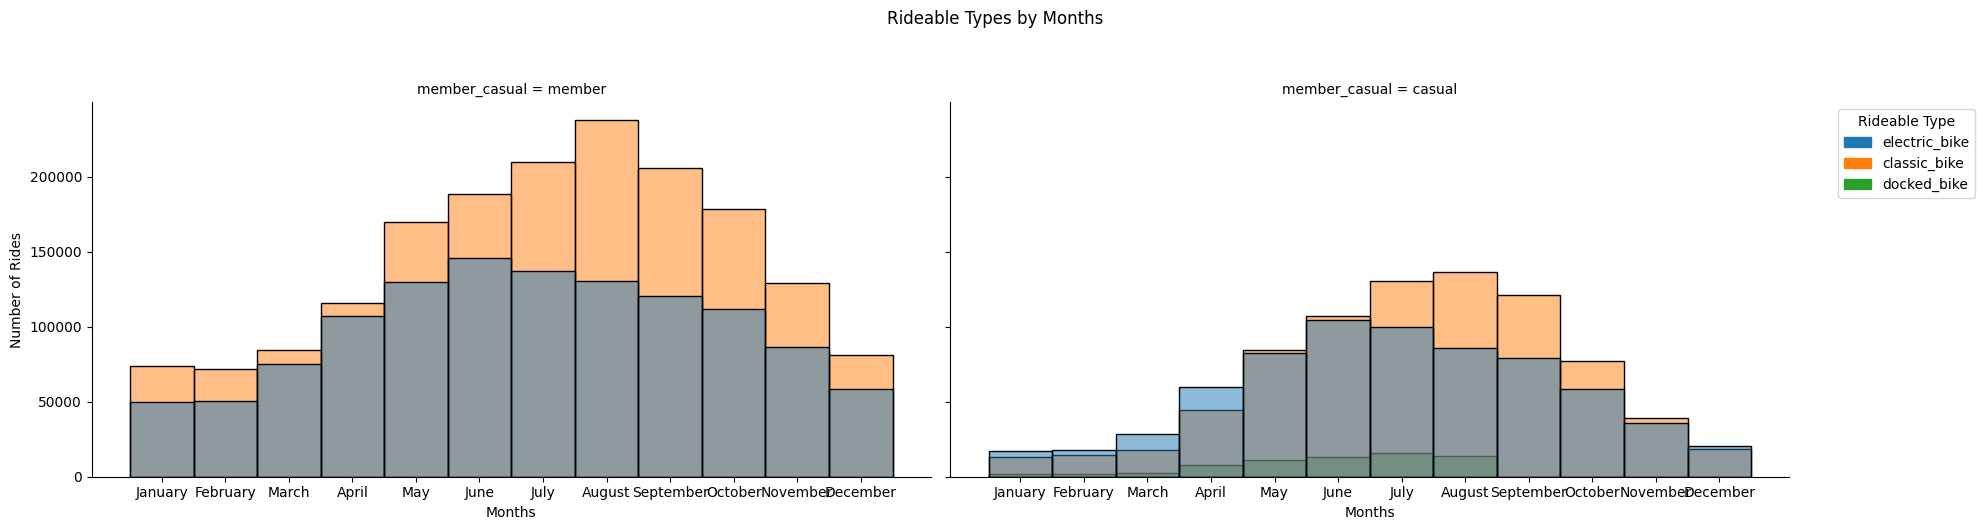

In [20]:
from matplotlib.patches import Patch
plt.figure(figsize=(12, 5))
g = sns.FacetGrid(df, col='member_casual', height=5, aspect=2)
g.map_dataframe(sns.histplot, x='months', hue='rideable_type')
rideable_types = df['rideable_type'].unique()
colors = sns.color_palette(n_colors=len(rideable_types))
handles = [Patch(color=colors[i], label=rideable_type) for i, rideable_type in enumerate(rideable_types)]
plt.legend(handles=handles, title='Rideable Type', bbox_to_anchor=(1.05, 1), loc='upper left')
for ax in g.axes.flat:
    ax.set_xticks(df['months'].unique())
g.set_axis_labels('Months', 'Number of Rides')
g.fig.suptitle('Rideable Types by Months', y=1.05)
plt.tight_layout()
plt.show()

<p style="font-size:15px;">From the plot above, it seems Casuals really like Electric bikes in winter and spring but Classic bikes in summer.<br>
As for Members, there is no major changes in pattern

<p style="font-size:15px;">Now let's see how Members and Casuals differ in distance and duration by months

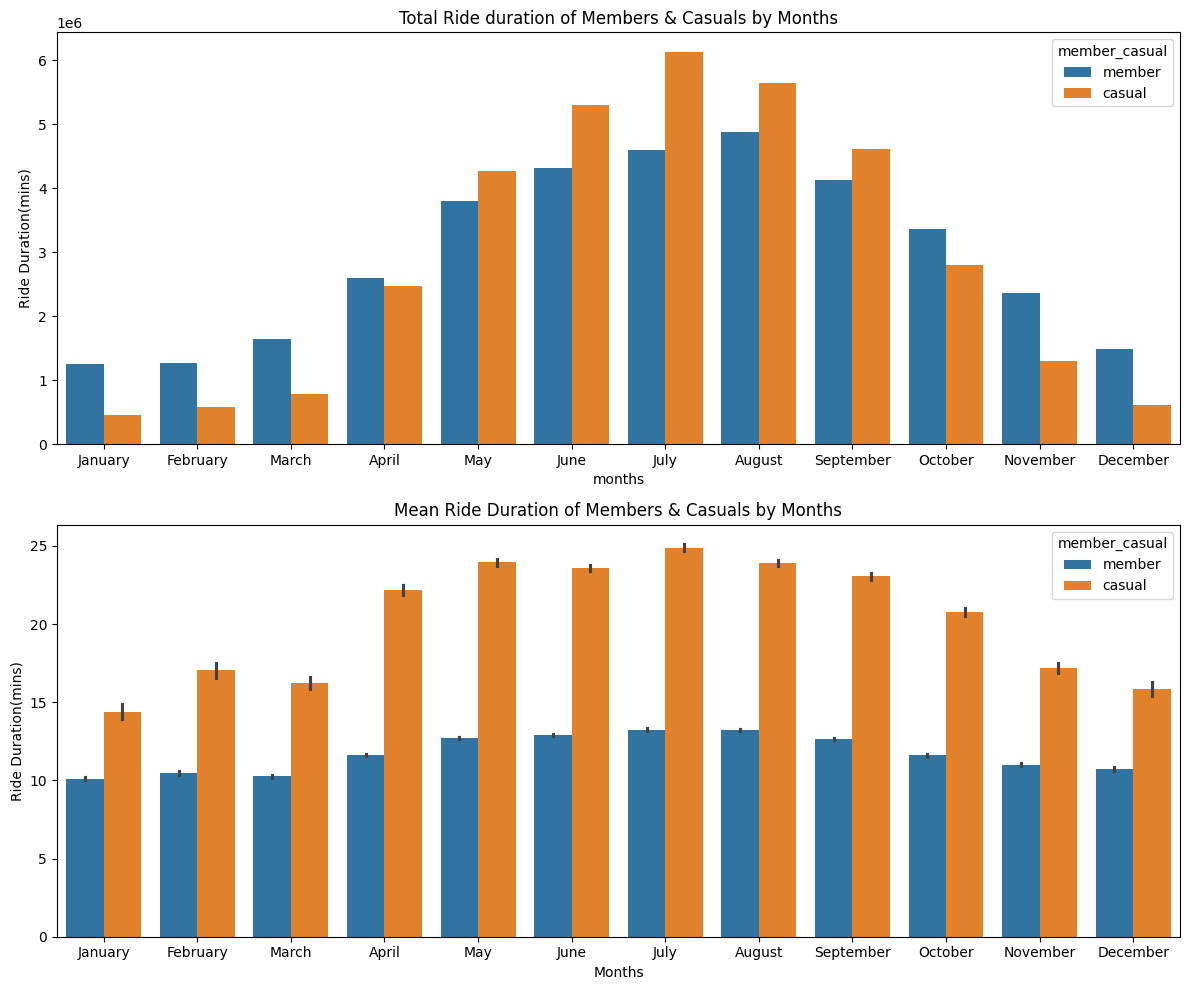

In [21]:
fig, axes = plt.subplots(2, 1, figsize=(12, 10))
month_order = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]
g_df = df.groupby(['months','member_casual'], as_index=False)['ride_duration_min'].sum()
sns.barplot(data=g_df.sort_values(by='months'), x='months', y='ride_duration_min', hue='member_casual', order=month_order,hue_order=hue_order, ax=axes[0])
axes[0].set_ylabel('Ride Duration(mins)')
axes[0].set_title('Total Ride duration of Members & Casuals by Months')

sns.barplot(data=df, x='months', y='ride_duration_min', hue='member_casual', ax=axes[1])
axes[1].set_xlabel('Months')
axes[1].set_ylabel('Ride Duration(mins)')
axes[1].set_title('Mean Ride Duration of Members & Casuals by Months')

plt.tight_layout()
plt.show()

<p style="font-size:15px;">We know Casuals ride long duration than Members, but during some months(winter and autumn) Members ride long duration this can be attributed to higher number of rides but there is a fall in average Casual ride duration as well

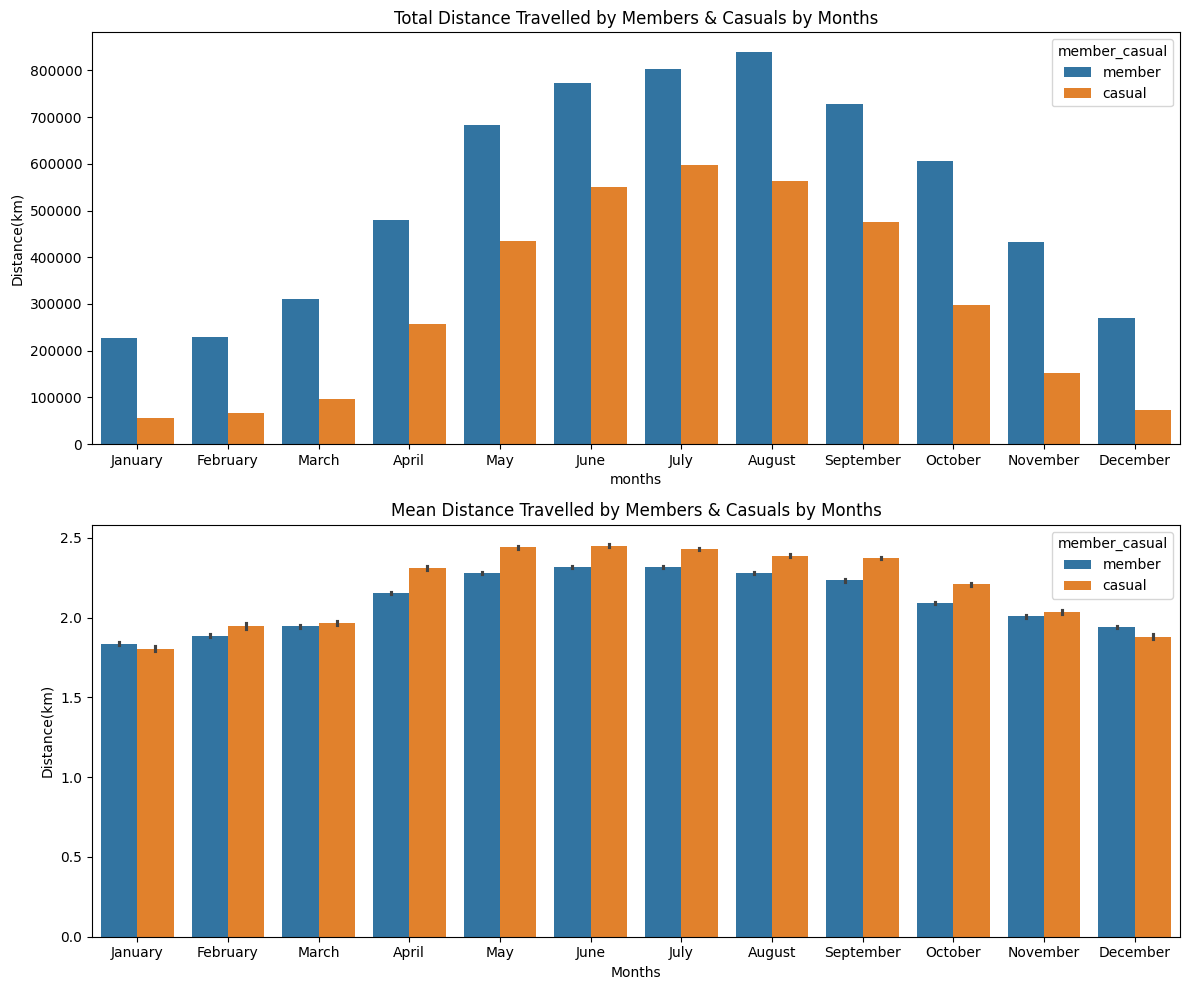

In [22]:
fig, axes = plt.subplots(2, 1, figsize=(12, 10))
g_df = df.groupby(['months','member_casual'], as_index=False)['distance_km'].sum()
sns.barplot(data=g_df.sort_values(by='months'), x='months', y='distance_km', hue='member_casual', order=month_order, hue_order=hue_order, ax=axes[0])
axes[0].set_ylabel('Distance(km)')
axes[0].set_title('Total Distance Travelled by Members & Casuals by Months')

sns.barplot(data=df, x='months', y='distance_km', hue='member_casual', ax=axes[1])
axes[1].set_xlabel('Months')
axes[1].set_ylabel('Distance(km)')
axes[1].set_title('Mean Distance Travelled by Members & Casuals by Months')

plt.tight_layout()
plt.show()

<p style="font-size:15px;">Members travel more distance than Casuals by months. On averge distance both Members and Casuals seem equal<br>
Now let's see how ride types differ in distance and duration by months

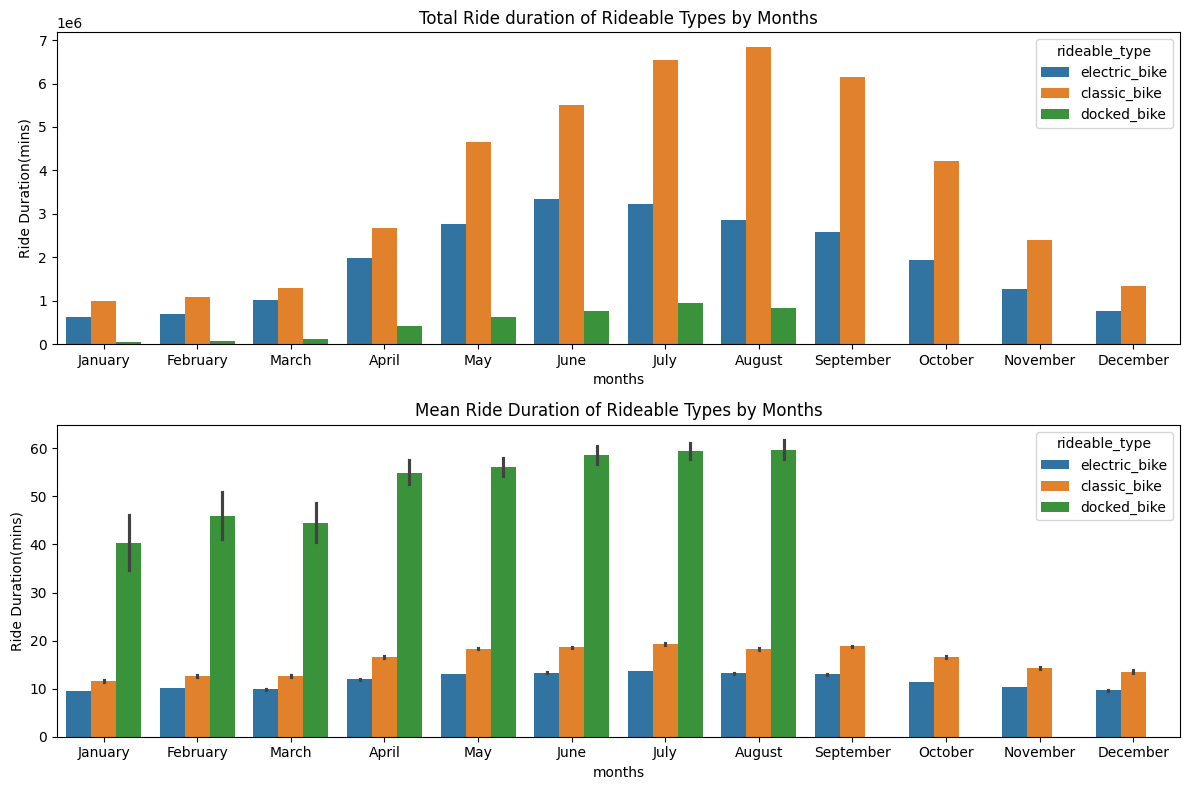

In [23]:
fig, axes = plt.subplots(2, 1, figsize=(12, 8))
g_df = df.groupby(['months','rideable_type'], as_index=False)['ride_duration_min'].sum()
hue_order = df['rideable_type'].unique()
sns.barplot(data=g_df.sort_values(by='months'), x='months', y='ride_duration_min', hue='rideable_type', order=month_order, hue_order=hue_order, ax=axes[0])
axes[0].set_ylabel('Ride Duration(mins)')
axes[0].set_title('Total Ride duration of Rideable Types by Months')

sns.barplot(data=df, x='months', y='ride_duration_min', hue='rideable_type', ax=axes[1])
axes[1].set_xlabel('months')
axes[1].set_ylabel('Ride Duration(mins)')
axes[1].set_title('Mean Ride Duration of Rideable Types by Months')

plt.tight_layout()
plt.show()

<p style="font-size:15px;">We can see that Classic bikes do longer duration than Electric bikes. Electric bikes travel long distance than Classic bikes on average.<br>
This can be due to manual vs electric. So for long distance travel Electric bike is preferred.

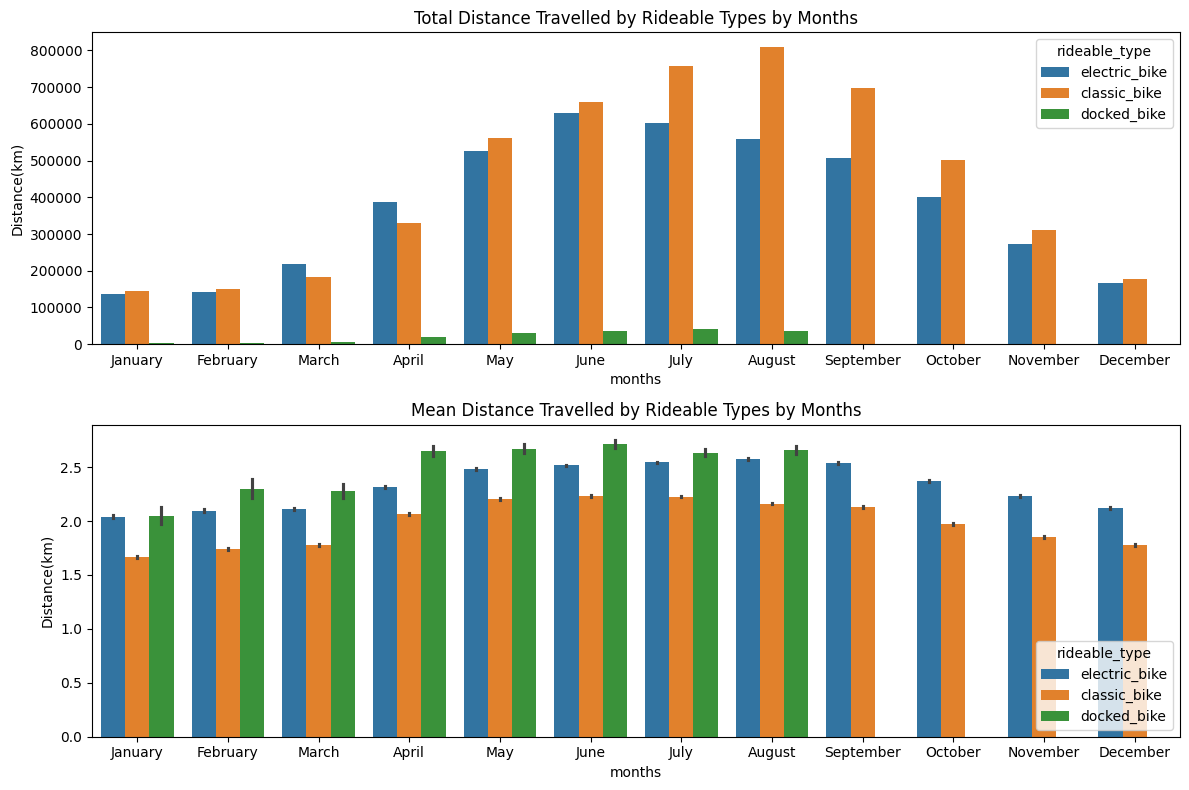

In [24]:
fig, axes = plt.subplots(2, 1, figsize=(12, 8))
g_df = df.groupby(['months','rideable_type'], as_index=False)['distance_km'].sum()
sns.barplot(data=g_df.sort_values(by='months'), x='months', y='distance_km', hue='rideable_type', order=month_order, hue_order=hue_order, ax=axes[0])
axes[0].set_ylabel('Distance(km)')
axes[0].set_title('Total Distance Travelled by Rideable Types by Months')

sns.barplot(data=df, x='months', y='distance_km', hue='rideable_type', ax=axes[1])
axes[1].set_xlabel('months')
axes[1].set_ylabel('Distance(km)')
axes[1].set_title('Mean Distance Travelled by Rideable Types by Months')

plt.tight_layout()
plt.show()

<p style="font-size:15px;">Now add Members and Casuals to the context

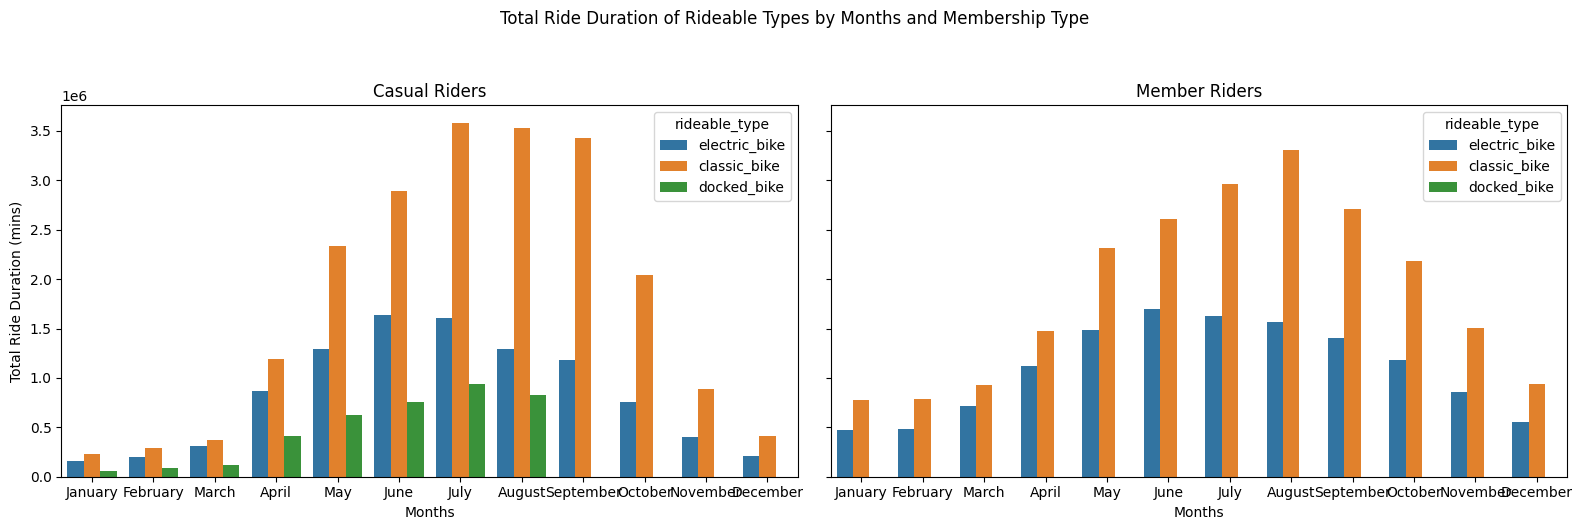

In [25]:
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
df['months'] = pd.Categorical(df['months'], categories=month_order, ordered=True)
df_sum = df.groupby(['months', 'rideable_type', 'member_casual'], as_index=False)['ride_duration_min'].sum()
fig, axes = plt.subplots(1, 2, figsize=(16, 5), sharey=True)
member_types = df_sum['member_casual'].unique()
for ax, member_type in zip(axes, member_types):
    sns.barplot(
        data=df_sum[df_sum['member_casual'] == member_type], x='months', y='ride_duration_min', hue='rideable_type', ax=ax, hue_order=hue_order,order=month_order)
    ax.set_title(f'{member_type.capitalize()} Riders')
    ax.set_xlabel('Months')
    ax.set_ylabel('Total Ride Duration (mins)')
fig.suptitle('Total Ride Duration of Rideable Types by Months and Membership Type', y=1.05)
plt.tight_layout()
plt.show()

<Figure size 1700x500 with 0 Axes>

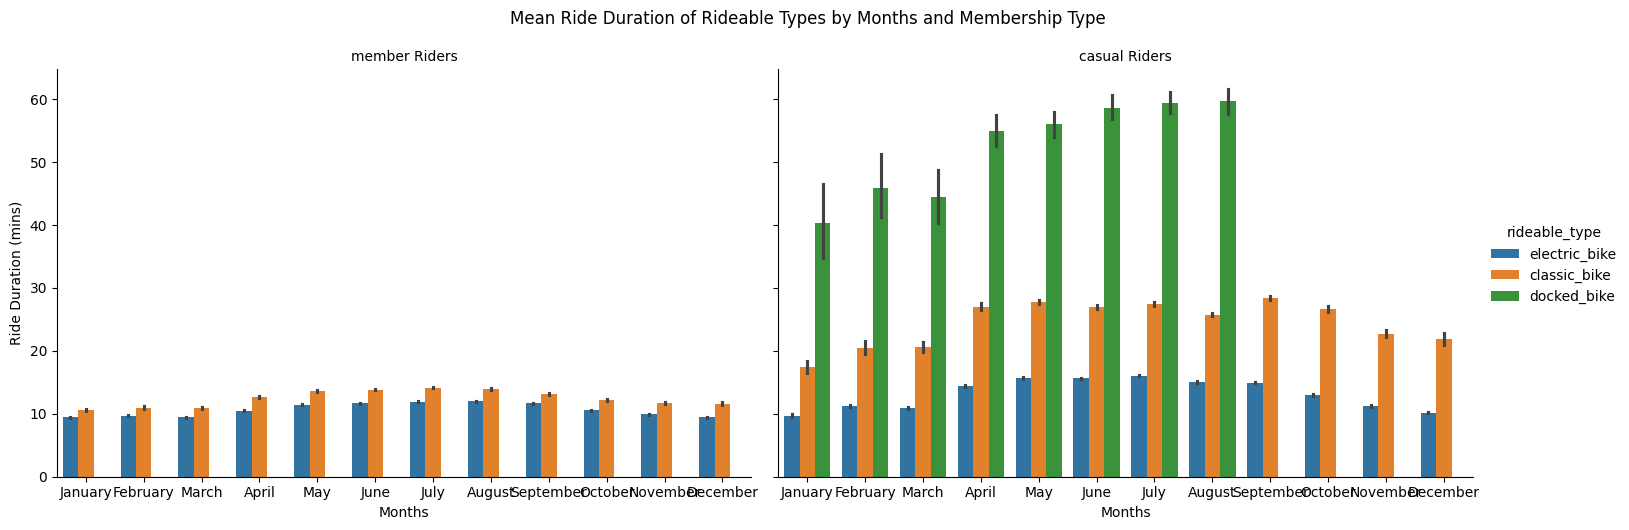

In [26]:
plt.figure(figsize=(17, 5))
g = sns.catplot(data=df,x='months',y='ride_duration_min',hue='rideable_type',col='member_casual',kind='bar',height=5,hue_order=hue_order, aspect=1.5)
g.set_axis_labels("Months", "Ride Duration (mins)")
g.set_titles("{col_name} Riders")
g.fig.suptitle('Mean Ride Duration of Rideable Types by Months and Membership Type', y=1.05)
plt.show()

<p style="font-size:15px;">Members ride duration by Electric and Classic bikes are seeing gradual increase and decrease by seasons. But Casuals show Sharp increase and decrease.<br>
In Members average distance travelled by Electric bikes is higher than Classic bikes but in Casuals it's nearly equal

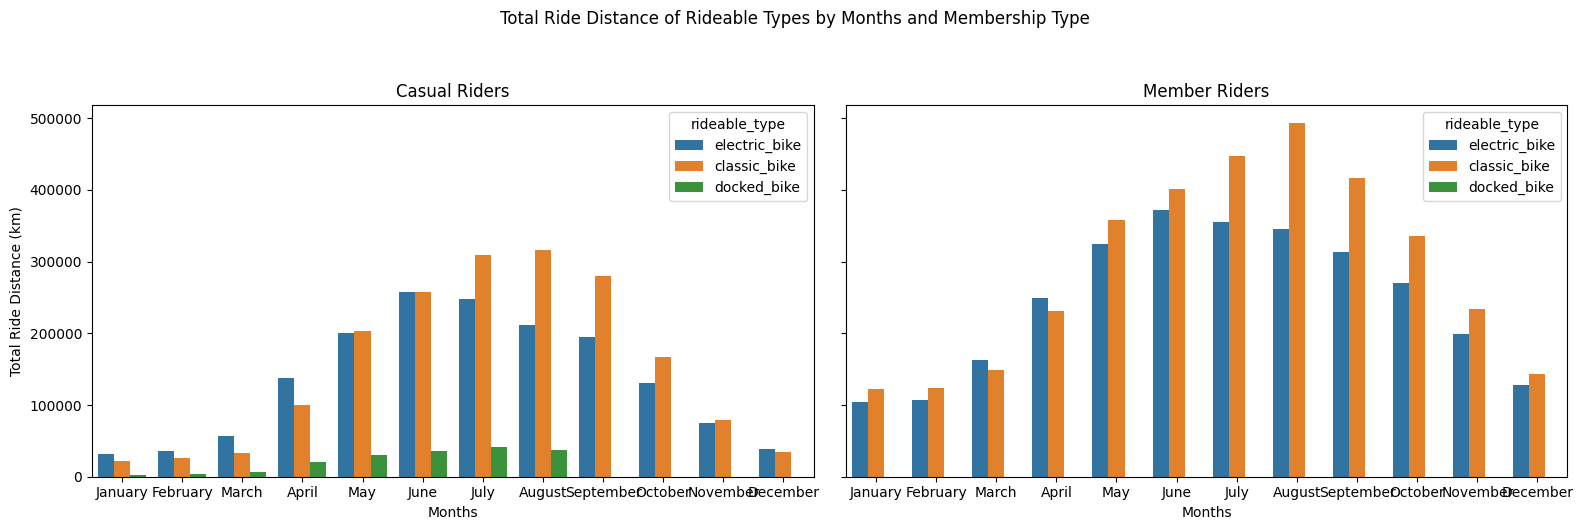

In [27]:
df_sum = df.groupby(['months', 'rideable_type', 'member_casual'], as_index=False)['distance_km'].sum()
fig, axes = plt.subplots(1, 2, figsize=(16, 5), sharey=True)
member_types = df_sum['member_casual'].unique()
for ax, member_type in zip(axes, member_types):
    sns.barplot(
        data=df_sum[df_sum['member_casual'] == member_type], x='months', y='distance_km', hue='rideable_type', hue_order=hue_order, ax=ax, order=month_order)
    ax.set_title(f'{member_type.capitalize()} Riders')
    ax.set_xlabel('Months')
    ax.set_ylabel('Total Ride Distance (km)')
fig.suptitle('Total Ride Distance of Rideable Types by Months and Membership Type', y=1.05)
plt.tight_layout()
plt.show()

<Figure size 1200x500 with 0 Axes>

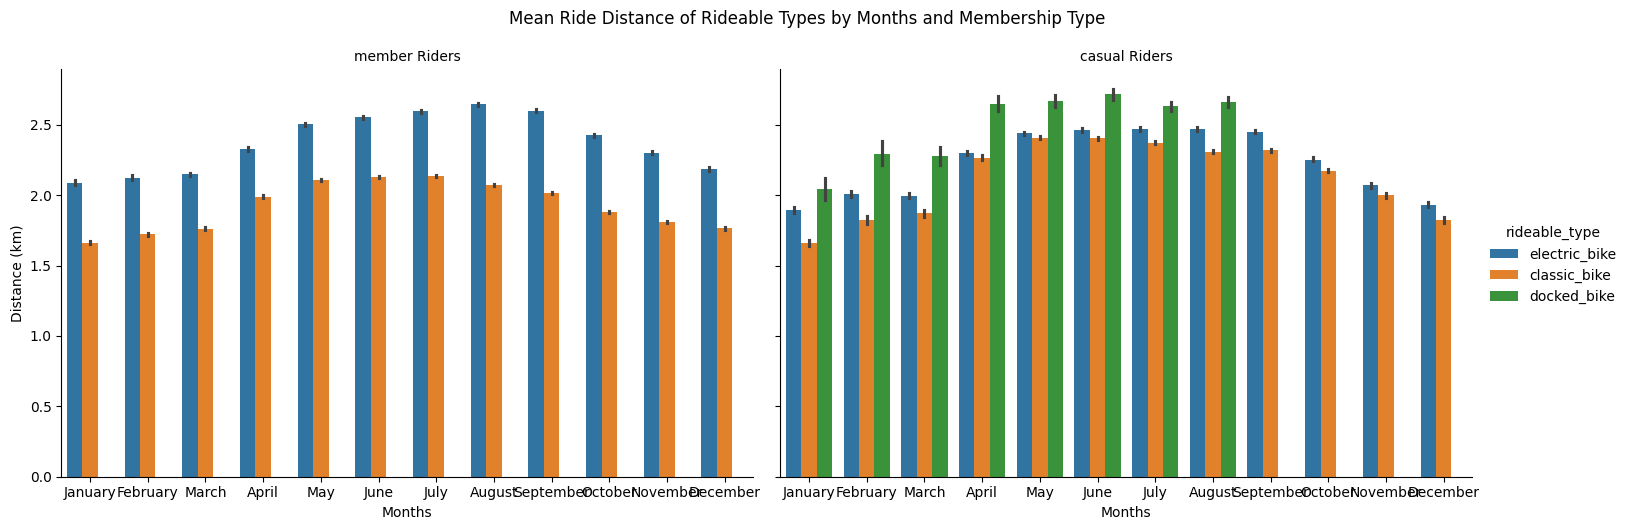

In [28]:
plt.figure(figsize=(12, 5))
g = sns.catplot(data=df,x='months',y='distance_km',hue='rideable_type',col='member_casual',kind='bar',hue_order=hue_order, height=5,aspect=1.5)
g.set_axis_labels("Months", "Distance (km)")
g.set_titles("{col_name} Riders")
g.fig.suptitle('Mean Ride Distance of Rideable Types by Months and Membership Type', y=1.05)
plt.show()

<p style="font-size:15px;">Now let's analyze by Seasons and Time of the day<br>
The following plot shows traffic is higher in summer and lower in winter. And both with peak hours in afternoon

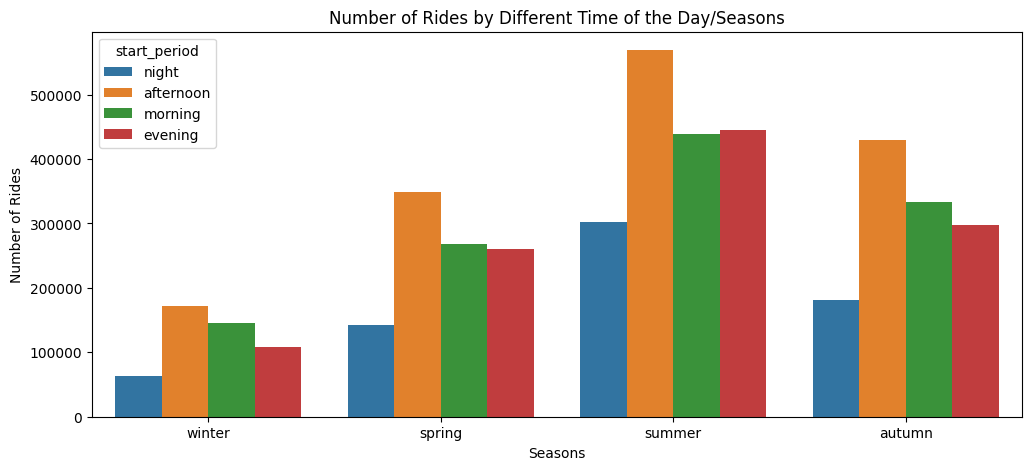

In [29]:
plt.figure(figsize=(12,5))
sns.countplot(data=df, x='seasons', hue='start_period')
plt.xlabel('Seasons')
plt.ylabel('Number of Rides')
plt.title('Number of Rides by Different Time of the Day/Seasons')
plt.show()

<p style="font-size:15px;">Members and Casuals Traffic by Time in different seasons

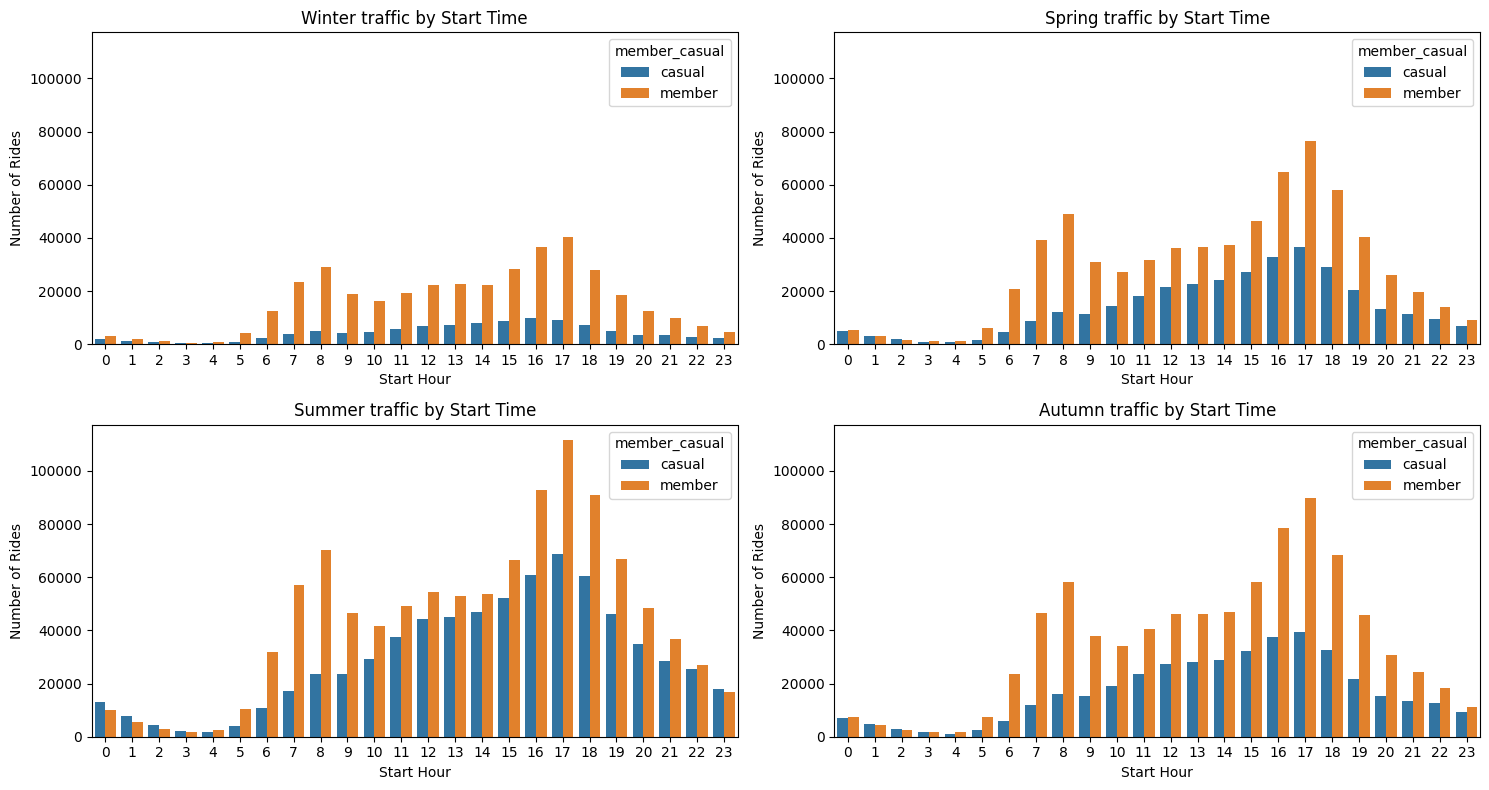

In [30]:
fig, axes = plt.subplots(2, 2, figsize=(15, 8))

periods = ['winter', 'spring', 'summer', 'autumn']
titles = ['Winter traffic by Start Time', 'Spring traffic by Start Time', 'Summer traffic by Start Time', 'Autumn traffic by Start Time']
hue_order = df['member_casual'].unique()[::-1]
for ax, period, title in zip(axes.flat, periods, titles):
    sns.countplot(data=df[df['seasons']==period], x='start_hour', hue='member_casual', hue_order =hue_order, ax=ax)
    ax.set_xlabel('Start Hour')
    ax.set_ylabel('Number of Rides')
    ax.set_title(title)

max_y = max(ax.get_ylim()[1] for ax in axes.flat)
for ax in axes.flat:
    ax.set_ylim(0, max_y)

plt.tight_layout()
plt.show()

<p style="font-size:15px;">We can see peak hours for Members is consistent with different seasons. Casuals have flat in winter and gradually increases from morning to evening in remaining seasons<br>

<p style="font-size:15px;">Members are most active during peak hours, typically from 7:00 AM to 9:00 AM and 4:00 PM to 6:00 PM. This likely coincides with commutes to and from work.

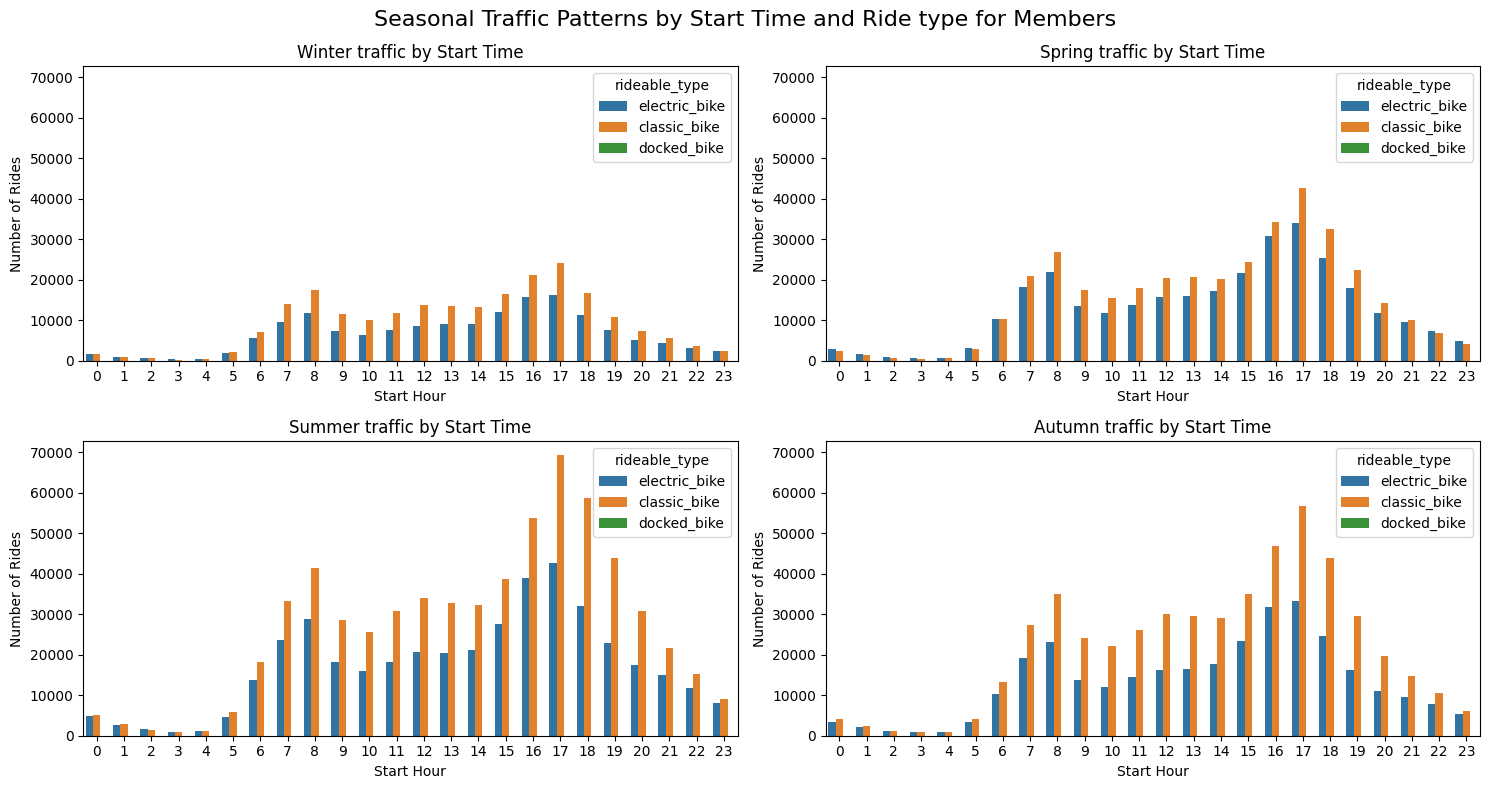

In [31]:
fig, axes = plt.subplots(2, 2, figsize=(15, 8))

periods = ['winter', 'spring', 'summer', 'autumn']
titles = ['Winter traffic by Start Time', 'Spring traffic by Start Time', 'Summer traffic by Start Time', 'Autumn traffic by Start Time']
hue_order = df['rideable_type'].unique()
g_df = df[df['member_casual']=='member']
for ax, period, title in zip(axes.flat, periods, titles):
    sns.countplot(data=g_df[g_df['seasons']==period], x='start_hour', hue='rideable_type', hue_order=hue_order, ax=ax)
    ax.set_xlabel('Start Hour')
    ax.set_ylabel('Number of Rides')
    ax.set_title(title)

max_y = max(ax.get_ylim()[1] for ax in axes.flat)
for ax in axes.flat:
    ax.set_ylim(0, max_y)
fig.suptitle('Seasonal Traffic Patterns by Start Time and Ride type for Members', fontsize=16)
plt.tight_layout()
plt.show()

<p style="font-size:15px;">In case of Members, Electric bikes always trails the Classic bikes in all hours<br>
For Casuals in winter and Spring time their preferrence for Electric bikes is more than Classic bikes.

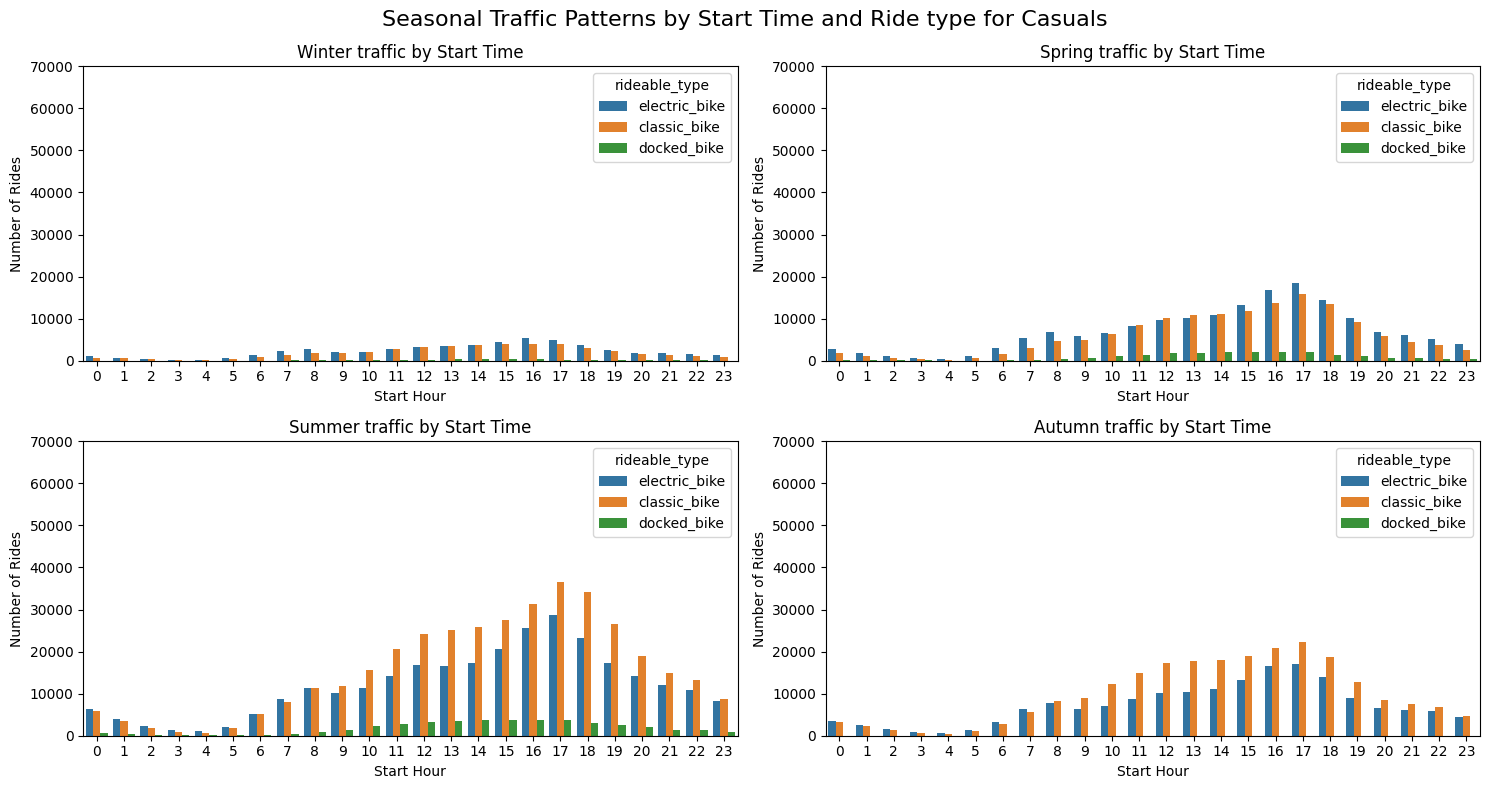

In [32]:
fig, axes = plt.subplots(2, 2, figsize=(15, 8))

periods = ['winter', 'spring', 'summer', 'autumn']
titles = ['Winter traffic by Start Time', 'Spring traffic by Start Time', 'Summer traffic by Start Time', 'Autumn traffic by Start Time']
hue = df['rideable_type'].unique()
g_df = df[df['member_casual']=='casual']
for ax, period, title in zip(axes.flat, periods, titles):
    sns.countplot(data=g_df[g_df['seasons']==period], x='start_hour', hue='rideable_type', hue_order=hue_order, ax=ax)
    ax.set_xlabel('Start Hour')
    ax.set_ylabel('Number of Rides')
    ax.set_title(title)

max_y = max(ax.get_ylim()[1] for ax in axes.flat)
for ax in axes.flat:
    ax.set_ylim(0, 70000)
fig.suptitle('Seasonal Traffic Patterns by Start Time and Ride type for Casuals', fontsize=16)
plt.tight_layout()
plt.show()

In [33]:
df = df.sort_values(by='weeks_num')

<p style="font-size:15px;">Let's see Rides differ by Days

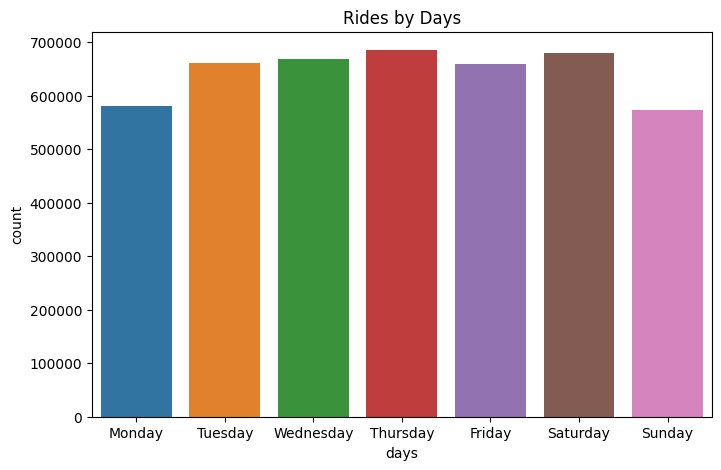

In [34]:
plt.figure(figsize=(8,5))
hue_order=df['member_casual'].unique()[::-1]
sns.countplot(data=df, x='days', hue='days')
plt.title('Rides by Days')
plt.legend().remove()
plt.show()

<p style="font-size:15px;">Now let's see Traffic by Members and Casuals in a week

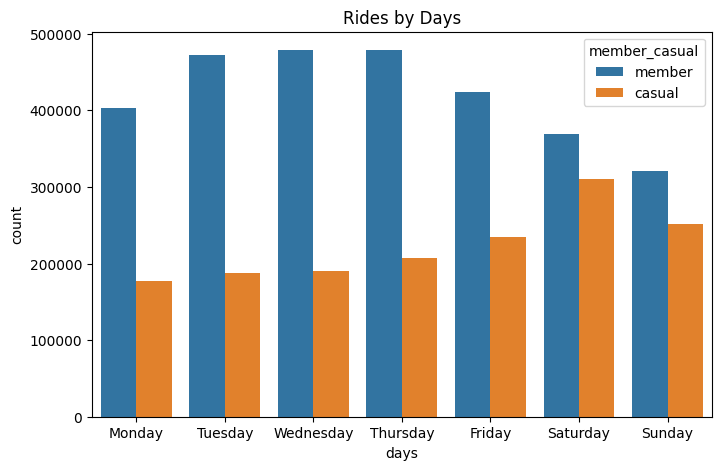

In [35]:
plt.figure(figsize=(8,5))
sns.countplot(data=df, x='days', hue='member_casual', hue_order = hue_order)
plt.title('Rides by Days')
plt.show()

<p style="font-size:15px;">We can see clearly that Members mostly ride during weekdays and Casuals during weekends

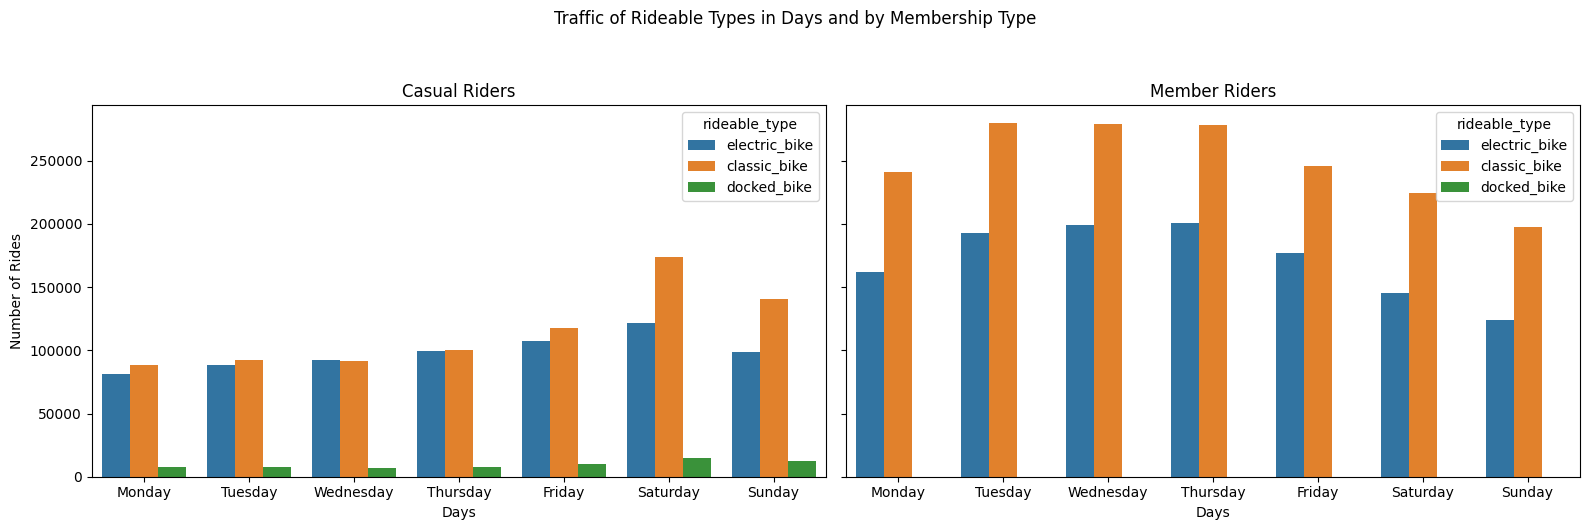

In [36]:
fig, axes = plt.subplots(1, 2, figsize=(16, 5), sharey=True)
member_types = df_sum['member_casual'].unique()
hue_order = df['rideable_type'].unique()
for ax, member_type in zip(axes, member_types):
    sns.countplot(
        data=df[df['member_casual'] == member_type], x='days', hue='rideable_type', ax=ax, hue_order=hue_order)
    ax.set_title(f'{member_type.capitalize()} Riders')
    ax.set_xlabel('Days')
    ax.set_ylabel('Number of Rides')
fig.suptitle('Traffic of Rideable Types in Days and by Membership Type', y=1.05)
plt.tight_layout()
plt.show()

<p style="font-size:15px;">We can see clearly in Casual riders that Electric and Classic bike rides are neck to neck in weekdays but in weekends Classic bikes are preferred by Casual riders.<br>
For Members, Electric bikes trail Classic bikes consistently during all days of the week.

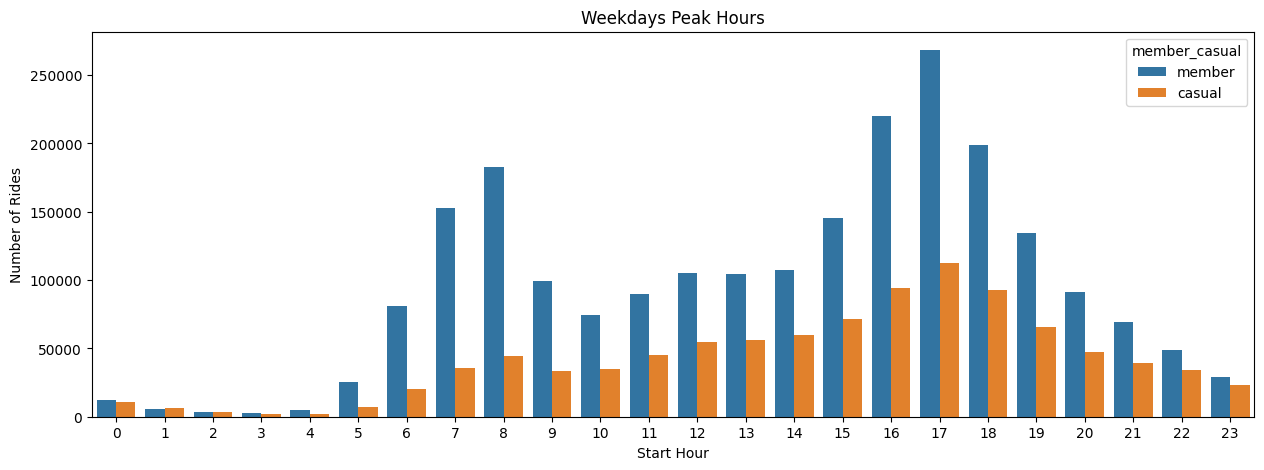

In [37]:
plt.figure(figsize=(15, 5))
hue_order = df['member_casual'].unique()[::-1]
g_df=df[df['week']=='weekday']
sns.countplot(data=g_df, x='start_hour', hue='member_casual', hue_order=hue_order)
plt.xlabel('Start Hour')
plt.ylabel('Number of Rides')
plt.title('Weekdays Peak Hours')
plt.show()

<p style="font-size:15px;">From the plots above and below we can see there are a clear peak hours in weekdays for both Members and Casuals.<br>
During weekends there is gradual increase in rides from morning and peaks in afternoon and then decreases gradually.

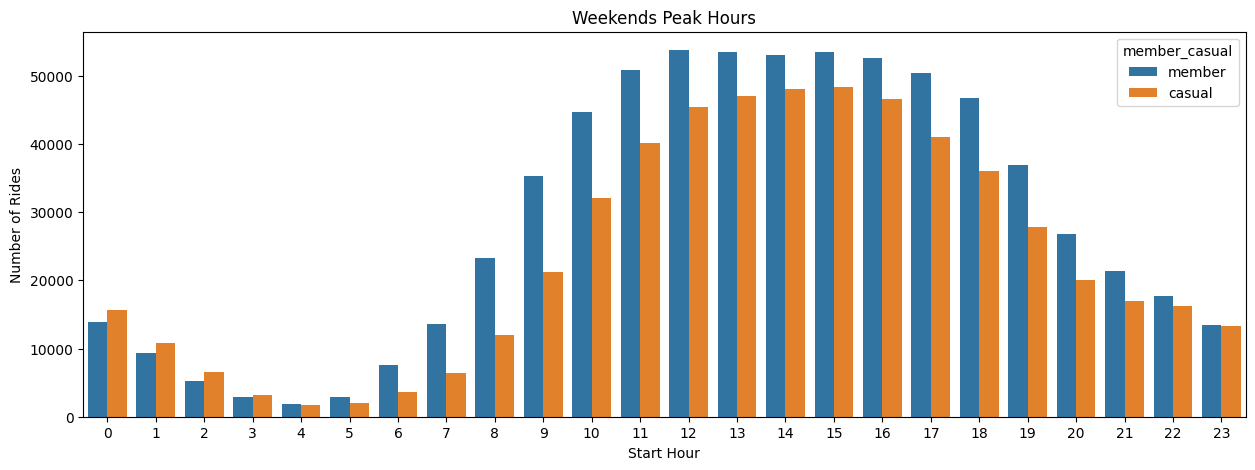

In [38]:
plt.figure(figsize=(15, 5))
g_df=df[df['week']=='weekend']
sns.countplot(data=g_df, x='start_hour', hue='member_casual', hue_order=hue_order)
plt.xlabel('Start Hour')
plt.ylabel('Number of Rides')
plt.title('Weekends Peak Hours')
plt.show()

<p style="font-size:15px;">Start stations and End stations by their intensity

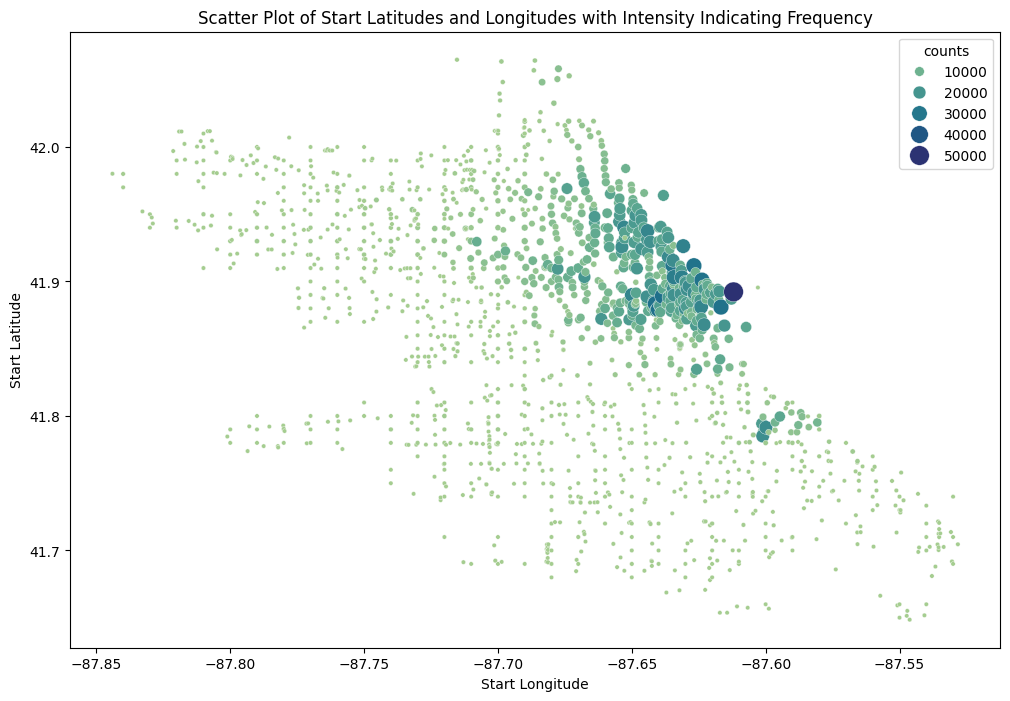

In [39]:
point_counts = df.groupby(['start_lng', 'start_lat']).size().reset_index(name='counts')
plt.figure(figsize=(12, 8))
sns.scatterplot(data=point_counts, x='start_lng', y='start_lat', size='counts', sizes=(10, 200), hue='counts', palette='crest')
plt.xlabel('Start Longitude')
plt.ylabel('Start Latitude')
plt.title('Scatter Plot of Start Latitudes and Longitudes with Intensity Indicating Frequency')
plt.show()

<p style="font-size:15px;">Clearly Central, North Side, West Side and South Side Were the most trafficed locations.

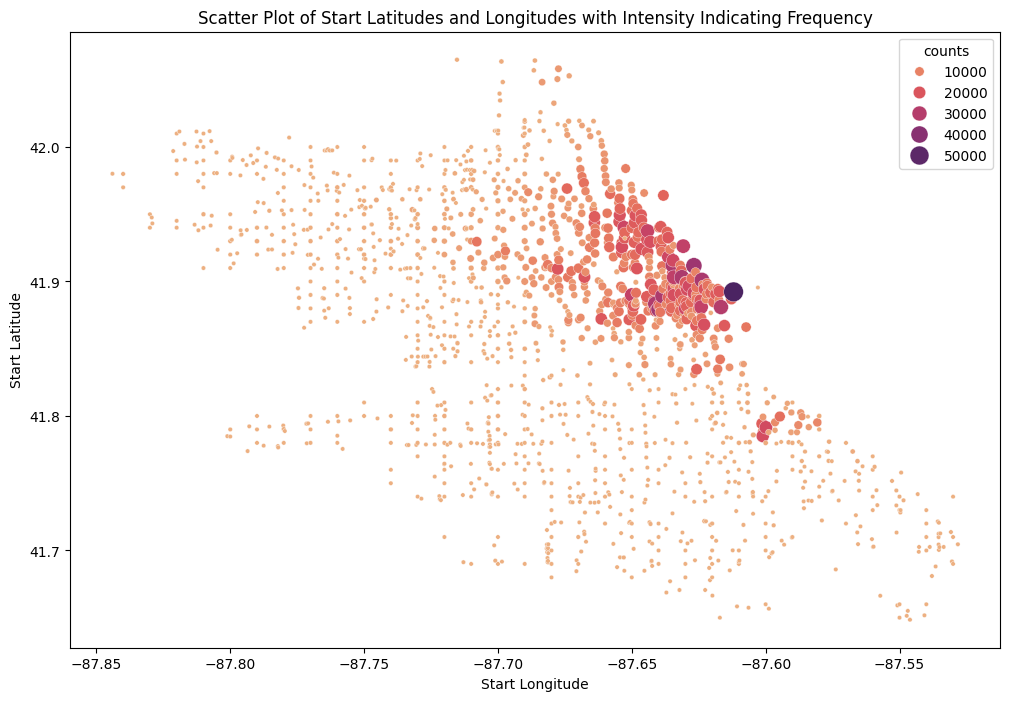

In [40]:
point_counts = df.groupby(['end_lng', 'end_lat']).size().reset_index(name='counts')
plt.figure(figsize=(12, 8))
sns.scatterplot(data=point_counts, x='end_lng', y='end_lat', size='counts', sizes=(10,200), hue='counts', palette='flare')
plt.xlabel('Start Longitude')
plt.ylabel('Start Latitude')
plt.title('Scatter Plot of Start Latitudes and Longitudes with Intensity Indicating Frequency')
plt.show()

In [41]:
print(df['start_station_name'].nunique())
print(df['end_station_name'].nunique())

1540
1541


<p style="font-size:15px;">So there are 1541 stations and compraising of nearly 200000 different routes

In [42]:
df['routes'].nunique()

198044

<p style="font-size:15px;">Eventhough there are many routes but the major part of the traffic is around the top 10000 routes

In [43]:
df['routes'].value_counts().nlargest(10000).sum()/df['routes'].value_counts().sum() * 100

51.8879547768585

In [44]:
df[df['member_casual']=='member']['routes'].value_counts().nlargest(10000).sum()/df[df['member_casual']=='member']['routes'].value_counts().sum() * 100

54.41582342949551

<p style="font-size:15px;">We can see that both Members and Casuals are concentrated in these 10000 routes

In [45]:
df[df['member_casual']=='casual']['routes'].value_counts().nlargest(10000).sum()/df[df['member_casual']=='casual']['routes'].value_counts().sum() * 100

53.40595769341476

In [46]:
top_routes = df['routes'].value_counts().nlargest(10000)
top_routes_df = df[df['routes'].isin(top_routes.index)]

<p style="font-size:15px;">Let's plot these Top Routes

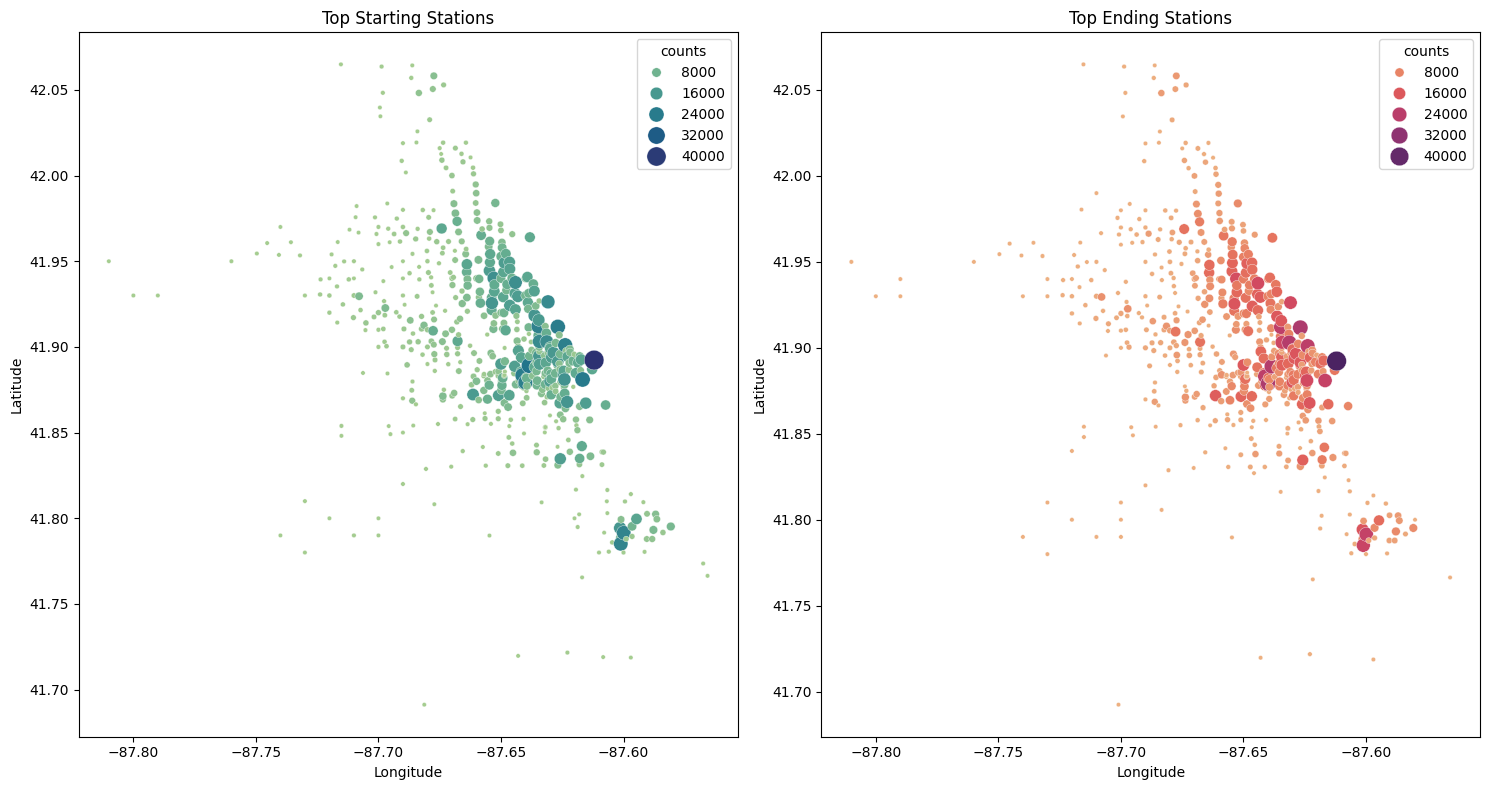

In [47]:
fig, axes =plt.subplots(1, 2, figsize=(15, 8))

point_counts = top_routes_df.groupby(['start_lng', 'start_lat']).size().reset_index(name='counts')
sns.scatterplot(data=point_counts, x='start_lng', y='start_lat', hue='counts', size='counts', sizes=(10, 200), palette='crest', ax=axes[0])
axes[0].set_title('Top Starting Stations')
axes[0].set_xlabel('Longitude')
axes[0].set_ylabel('Latitude')

point_counts = top_routes_df.groupby(['end_lng', 'end_lat']).size().reset_index(name='counts')
sns.scatterplot(data=point_counts, x='end_lng', y='end_lat', hue='counts', size='counts', sizes=(10, 200), palette='flare', ax=axes[1])
axes[1].set_title('Top Ending Stations')
axes[1].set_xlabel('Longitude')
axes[1].set_ylabel('Latitude')

plt.tight_layout()
plt.show()

<p style="font-size:15px;">So let's get the stations of these top routes into a list

In [48]:
start_station_list = top_routes_df['start_station_name'].tolist()
end_station_list = top_routes_df['end_station_name'].tolist()
top_stations_list = list(set(start_station_list + end_station_list))
print(len(top_stations_list))

553


<p style="font-size:15px;">Now let's find the top stations at peak hours

In [49]:
g = df[(df['week']=='weekday')&(df['start_hour'].isin([7,8,9,16,17,18]))]
g['routes'].value_counts().nlargest(10000).sum()/ g['routes'].value_counts().sum() * 100

55.517280457685935

In [50]:
work_routes = g['routes'].value_counts().nlargest(10000)
work_routes_df = df[df['routes'].isin(work_routes.index)]

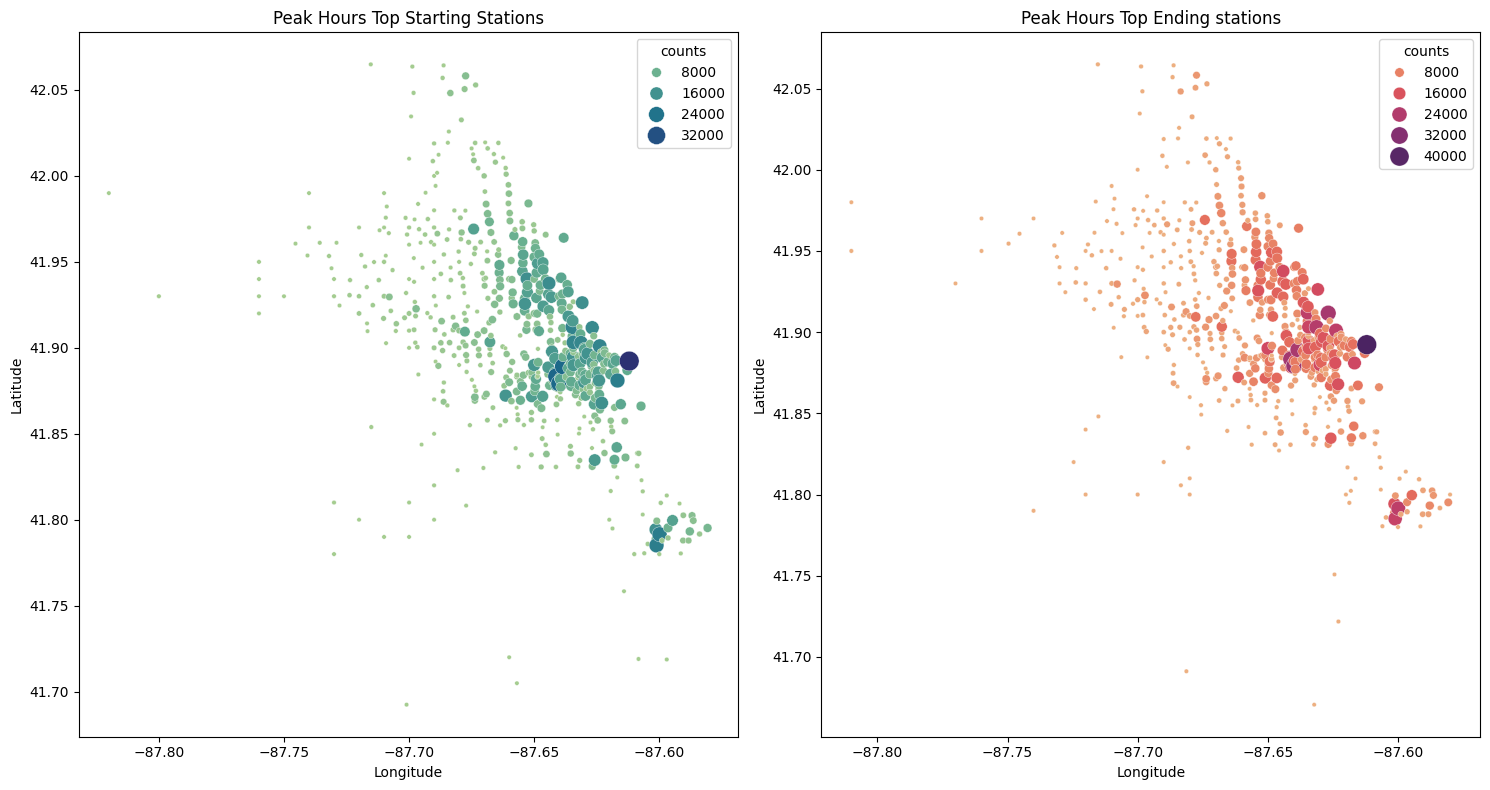

In [51]:
fig, axes =plt.subplots(1, 2, figsize=(15, 8))

point_counts = work_routes_df.groupby(['start_lng', 'start_lat']).size().reset_index(name='counts')
sns.scatterplot(data=point_counts, x='start_lng', y='start_lat', hue='counts', size='counts', sizes=(10, 200), palette='crest', ax=axes[0])
axes[0].set_title('Peak Hours Top Starting Stations')
axes[0].set_xlabel('Longitude')
axes[0].set_ylabel('Latitude')

point_counts = work_routes_df.groupby(['end_lng', 'end_lat']).size().reset_index(name='counts')
sns.scatterplot(data=point_counts, x='end_lng', y='end_lat', hue='counts', size='counts', sizes=(10, 200), palette='flare', ax=axes[1])
axes[1].set_title('Peak Hours Top Ending stations')
axes[1].set_xlabel('Longitude')
axes[1].set_ylabel('Latitude')

plt.tight_layout()
plt.show()

In [52]:
start_list = work_routes_df['start_station_name'].tolist()
end_list = work_routes_df['end_station_name'].tolist()
regular_stations_list = list(set(start_list + end_list))
print(len(regular_stations_list))

580


In [53]:
Important_stations_list = list(set(regular_stations_list+top_stations_list))
print(len(Important_stations_list))

603


<a id="5"></a>
### Act

#### Conclusion:

> - Members constitute 65% of the rides whereas Casuals constitute 35% of the rides. Average distance travelled by both are same but Casuals take long duration rides.

> - Seasons affect the ridership especially during the winter season, we can see drastic fall in ridership from Casuals than Members.

> - Seasons also affect the ride types. Classic bikes are preferred in summer and autumn than Electric bikes but During winter and Spring Electric bikes are catching up the Classic bikes popularity. For Casuals Electric is preferred more than Classic bikes during winter and spring.

> - Members are most active during weekdays in peak hours typically from 7 to 9 A.M and 4 to 6 P.M. This likely coincides with commute to and from work. Casuals are most active during weekends and Classic bikes are their preferred choice.

> - More than 50% of the traffic happens from 1/3rd of the total stations and they are located in these areas: Central, North Side, West Side, and South Side.(FYI: There are 9 areas in total)

#### Recommendations:

> - On average Casuals ride the same distance as the Members but take long duration. So I recommend to drop the single day pass price plan, to increase the membership.

> - Create new pricing plans for Casuals by different ride types and maintain the same pricing plan for Members of all ride types.

> - Provide benefits like loyalty points or additional services for Members and run an ad campaign during peak commute hours (7-9 AM and 4-6 PM) and afternoon to encourage more frequent use.

> - For marketing and ad target the stations from Important_stations_list where traffic is high